<a href="https://colab.research.google.com/github/amita-kapoor/COVID-2020/blob/master/Covid19_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Source: https://github.com/imdevskp/covid-19-india-data


In [0]:
# libraries

from datetime import datetime
import os
import glob
import requests 
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
# download data 
# =============

link = 'https://api.covid19india.org/csv/latest/raw_data.csv' #'https://docs.google.com/spreadsheets/d/e/2PACX-1vSz8Qs1gE_IYpzlkFkCXGcL_BqR8hZieWVi-rphN1gfrO3H4lDtVZs4kd0C3P8Y9lhsT1rhoB-Q_cP4/pubhtml#'
p_df = pd.read_csv(link)
p_df.head()

Patient Number  ...                                Backup Notes
0               1  ...                          Student from Wuhan
1               2  ...                          Student from Wuhan
2               3  ...                          Student from Wuhan
3               4  ...         Travel history to Italy and Austria
4               5  ...  Travel history to Dubai, Singapore contact

[5 rows x 20 columns]

In [0]:
# selecting important columns only
# ================================

p_df = p_df.loc[:, :'Backup Notes']

In [4]:
# looking for missing values 
# ==========================

p_df.isna().sum()

Patient Number                                   0
State Patient Number                         24901
Date Announced                                   7
Estimated Onset Date                         27898
Age Bracket                                  25552
Gender                                       22585
Detected City                                25551
Detected District                             7652
Detected State                                   8
State code                                       8
Current Status                                   7
Notes                                         1346
Contracted from which Patient (Suspected)    26335
Nationality                                  25191
Type of transmission                         24908
Status Change Date                             118
Source_1                                       391
Source_2                                     24025
Source_3                                     27446
Backup Notes                   

In [5]:
# no. of empty strings in each column
# ===================================

print(p_df.shape)

for i in p_df.columns:
    print(i, '\t', p_df[p_df[i]==''].shape[0])

(27898, 20)
Patient Number 	 0
State Patient Number 	 0
Date Announced 	 0
Estimated Onset Date 	 0
Age Bracket 	 0
Gender 	 0
Detected City 	 0
Detected District 	 0
Detected State 	 0
State code 	 0
Current Status 	 0
Notes 	 0
Contracted from which Patient (Suspected) 	 0
Nationality 	 0
Type of transmission 	 0
Status Change Date 	 0
Source_1 	 0
Source_2 	 0
Source_3 	 0
Backup Notes 	 0


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [6]:
# replacing empty strings with np.nan
# ==================================-

print(p_df.shape)

p_df = p_df.replace(r'', np.nan, regex=True)
p_df.isna().sum()


(27898, 20)


Patient Number                                   0
State Patient Number                         24901
Date Announced                                   7
Estimated Onset Date                         27898
Age Bracket                                  25552
Gender                                       22585
Detected City                                25551
Detected District                             7652
Detected State                                   8
State code                                       8
Current Status                                   7
Notes                                         1346
Contracted from which Patient (Suspected)    26335
Nationality                                  25191
Type of transmission                         24908
Status Change Date                             118
Source_1                                       391
Source_2                                     24025
Source_3                                     27446
Backup Notes                   

In [7]:
p_df

Patient Number  ...                                Backup Notes
0                   1  ...                          Student from Wuhan
1                   2  ...                          Student from Wuhan
2                   3  ...                          Student from Wuhan
3                   4  ...         Travel history to Italy and Austria
4                   5  ...  Travel history to Dubai, Singapore contact
...               ...  ...                                         ...
27893           27794  ...                                         NaN
27894           27794  ...                                         NaN
27895           27794  ...                                         NaN
27896           27794  ...                                         NaN
27897           27794  ...                                         NaN

[27898 rows x 20 columns]

In [8]:
# droping empty rows (row with just row number but without patient entry
# ======================================================================

p_df.dropna(subset=['Detected State'], inplace=True)
print(p_df.shape)
p_df.isna().sum()

(27890, 20)


Patient Number                                   0
State Patient Number                         24893
Date Announced                                   0
Estimated Onset Date                         27890
Age Bracket                                  25544
Gender                                       22577
Detected City                                25543
Detected District                             7644
Detected State                                   0
State code                                       0
Current Status                                   0
Notes                                         1338
Contracted from which Patient (Suspected)    26327
Nationality                                  25183
Type of transmission                         24900
Status Change Date                             110
Source_1                                       384
Source_2                                     24017
Source_3                                     27438
Backup Notes                   

In [9]:


p_df.columns



Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes'],
      dtype='object')

In [10]:
# rename dateframe columns 
# ========================

p_df.columns = ['_'.join(col.lower().split()) for col in p_df.columns]
p_df.rename(columns = {'contracted_from_which_patient_(suspected)':'suspected_contacted_patient'}, inplace=True)
p_df.sample(5)


patient_number state_patient_number  ... source_3  backup_notes
18907           18908                  NaN  ...      NaN           NaN
19922           19923                  NaN  ...      NaN           NaN
11850           11851             TN-P1208  ...      NaN           NaN
6536             6537                  NaN  ...      NaN           NaN
9376             9377                  NaN  ...      NaN           NaN

[5 rows x 20 columns]

In [11]:
# creating patient id column from patient number
# ===============================================

p_df['p_id'] = p_df['patient_number'].apply(lambda x : 'P'+str(x))
p_df.columns

Index(['patient_number', 'state_patient_number', 'date_announced',
       'estimated_onset_date', 'age_bracket', 'gender', 'detected_city',
       'detected_district', 'detected_state', 'state_code', 'current_status',
       'notes', 'suspected_contacted_patient', 'nationality',
       'type_of_transmission', 'status_change_date', 'source_1', 'source_2',
       'source_3', 'backup_notes', 'p_id'],
      dtype='object')

In [0]:
p_df = p_df.loc[:, :'backup_notes']

In [13]:


p_df.sample(5)



patient_number state_patient_number  ... source_3  backup_notes
19507           19508                  NaN  ...      NaN           NaN
4105             4107                  NaN  ...      NaN           NaN
24693           24694                  NaN  ...      NaN           NaN
6087             6088                  NaN  ...      NaN           NaN
23556           23557                  NaN  ...      NaN           NaN

[5 rows x 20 columns]

In [0]:
p_df.to_csv('patients_data.csv', index=False)

In [0]:
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  
%matplotlib inline
def plot_details(dataframe, column=None, column_value=None ):
  if column== None:
    p_small = dataframe.copy()
  else:
    p_small = dataframe[dataframe[column]==column_value]
  p_small['age_bracket'].fillna(0, inplace=True)
  p_small['current_status'].fillna('Unknown', inplace=True)
  p_small['gender'].fillna('Unknown', inplace=True)
  try:
    p_small['age_bracket'] = p_small['age_bracket'].astype(str).astype(float)
  except:
    pass
  try:
    fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(16,16))
    ax1.set_ylabel('Numbers',fontsize=20)
    ax1.set_xlabel('Gender',fontsize=20)
    p_small['gender'].hist(ax = ax1,label="Gender Distribution for " + column_value)
    ax2.set_ylabel('Numbers',fontsize=20)
    ax2.set_xlabel('Current status',fontsize=20)
    p_small['current_status'].hist(ax = ax2,label="Present status in " + column_value)
    ax3.set_ylabel('Frequency',fontsize=20)
    ax3.set_xlabel('Age',fontsize=20)
    p_small['age_bracket'].plot.kde(ax = ax3, label="Age distribution of infected in "+ column_value)
    #ax1.plot(df_combines['Germany'],'--o',ms=10,label='Germany')
    #ax1.plot(df_combines["Germany"].rolling(10).mean(),'--o',ms=10,label='Moving average 10 days' )
    ax1.legend(fontsize=15)
    ax2.legend(fontsize=15)
    ax3.legend(fontsize=15)
  except:
    pass
  return p_small


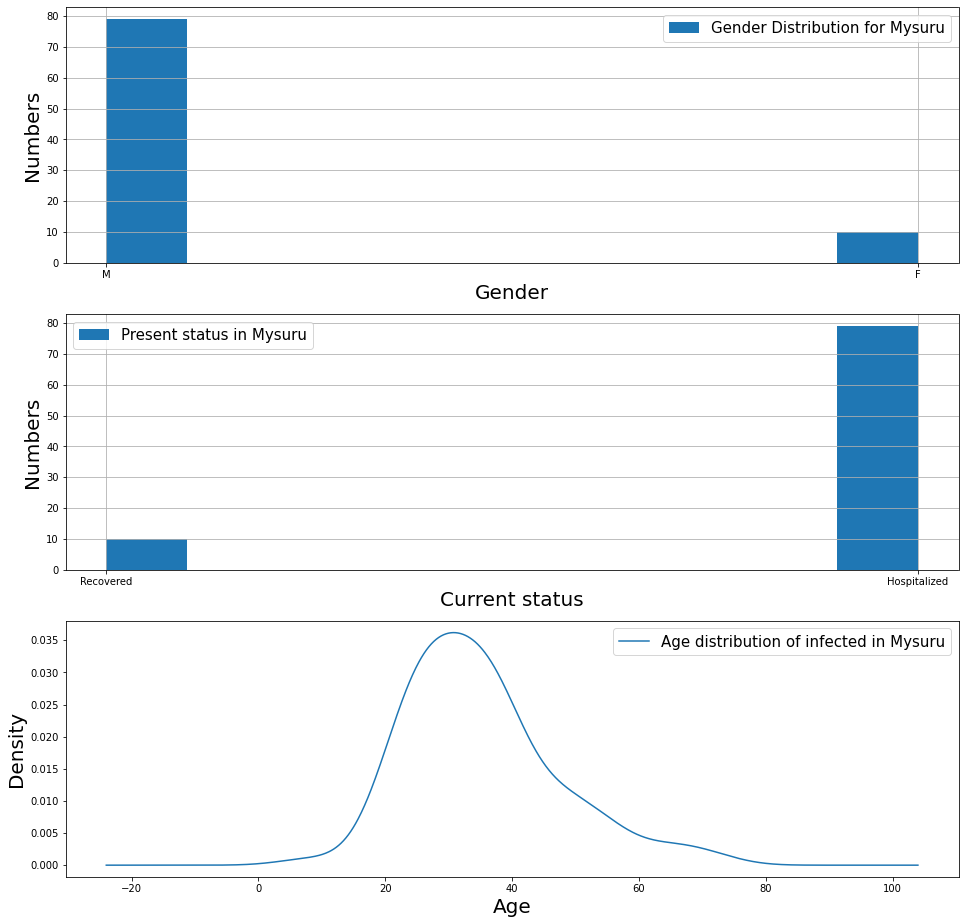

In [16]:
p_mysuru = plot_details(p_df,'detected_district','Mysuru')

In [0]:
States = set(p_df['detected_state'].tolist())  # to be used if you want to do it for all countries

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

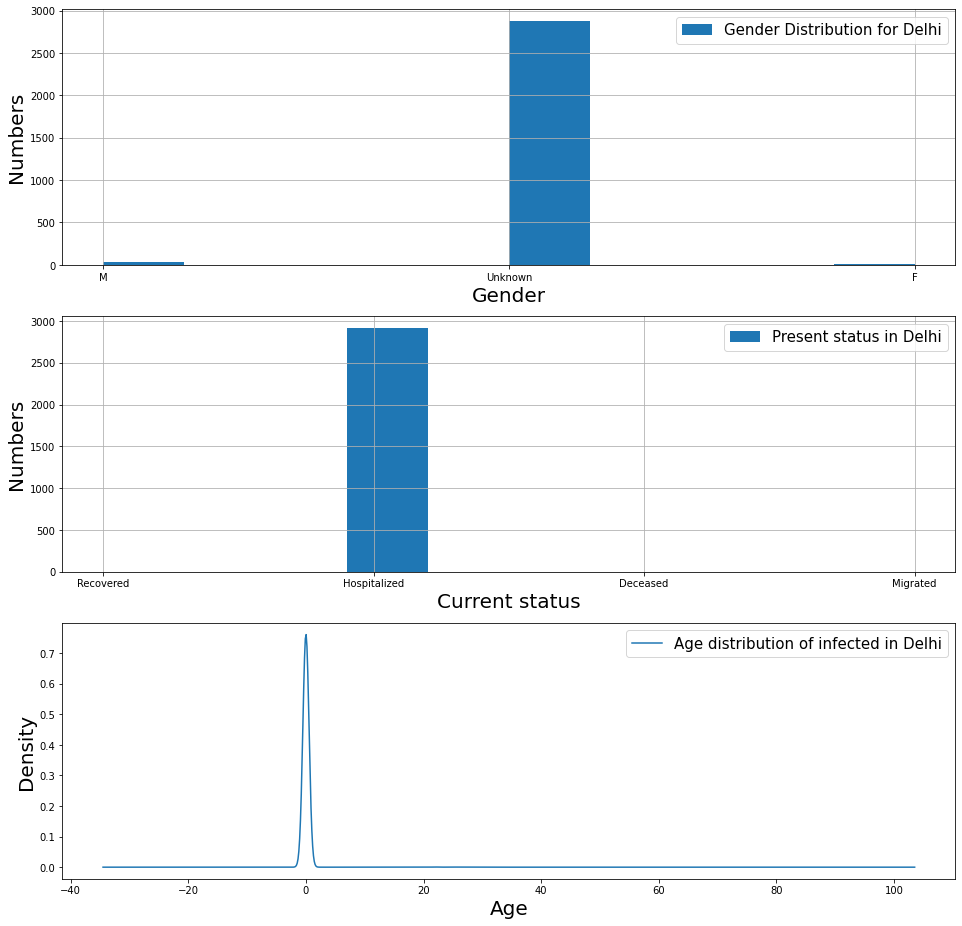

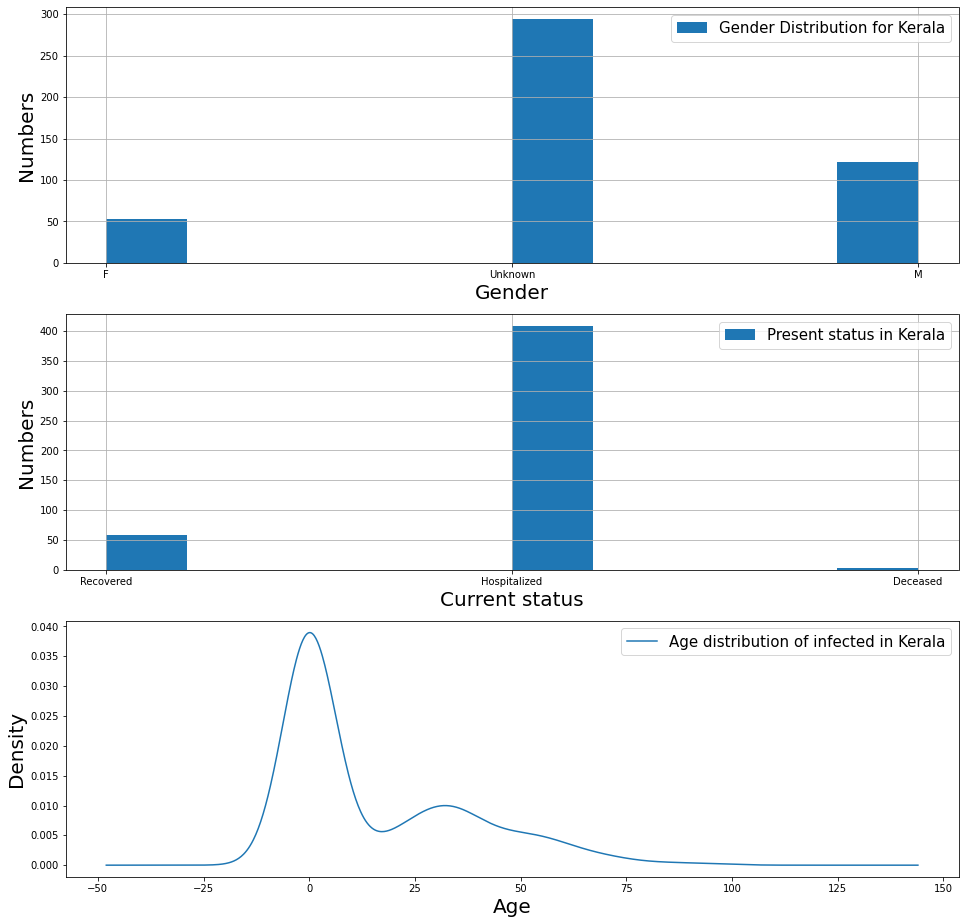

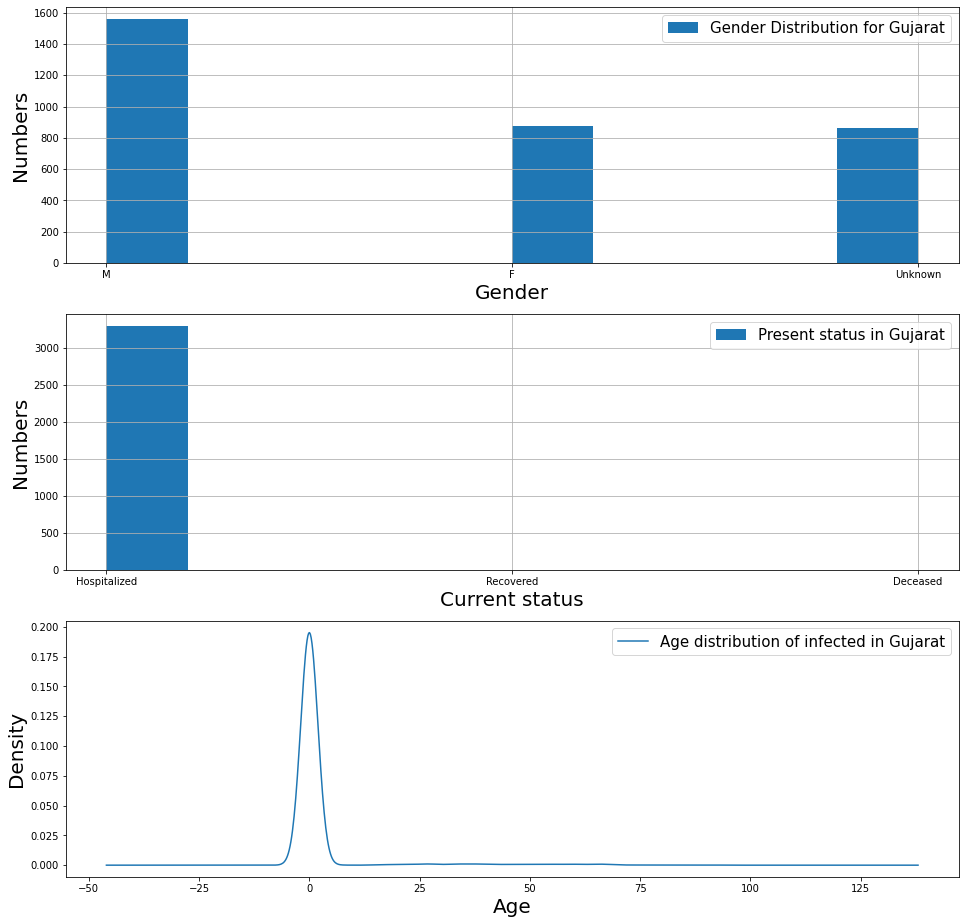

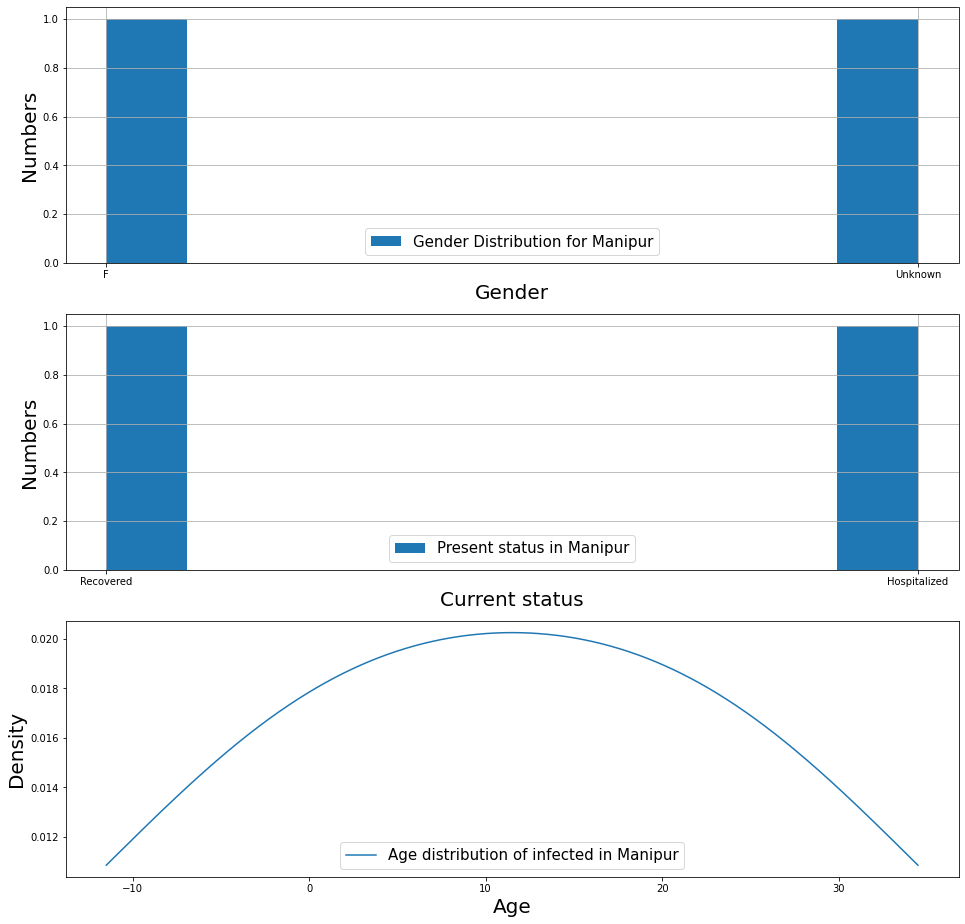

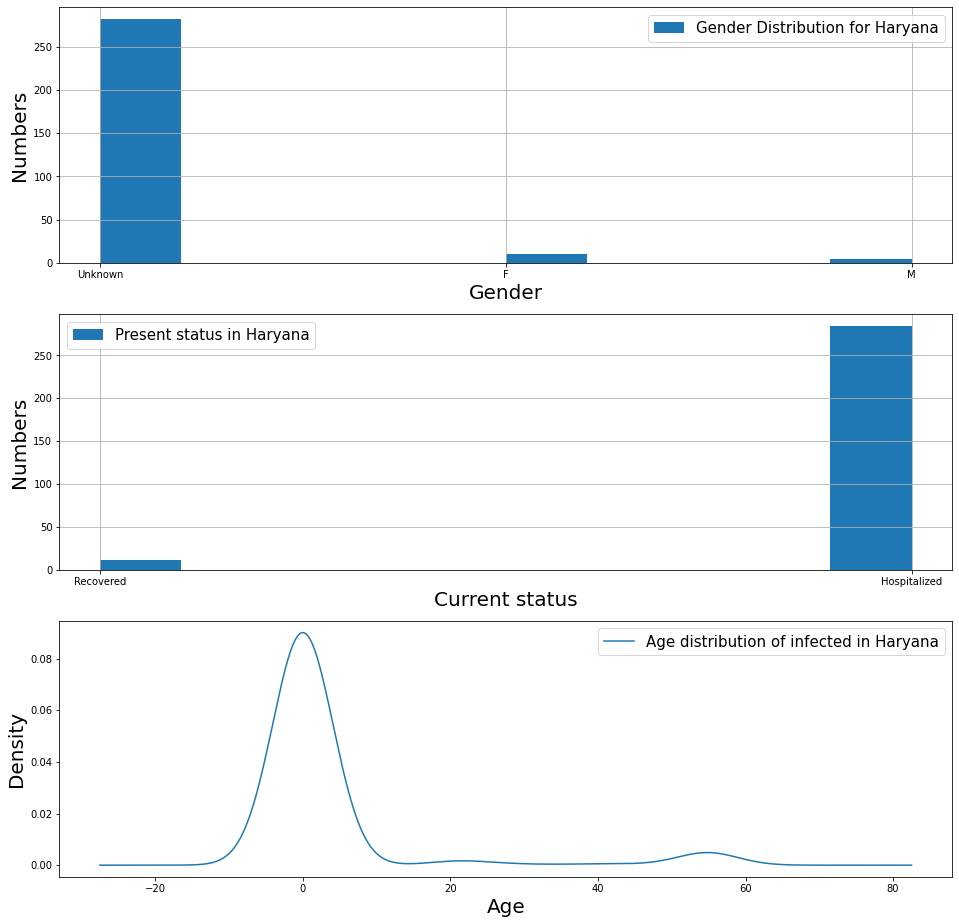

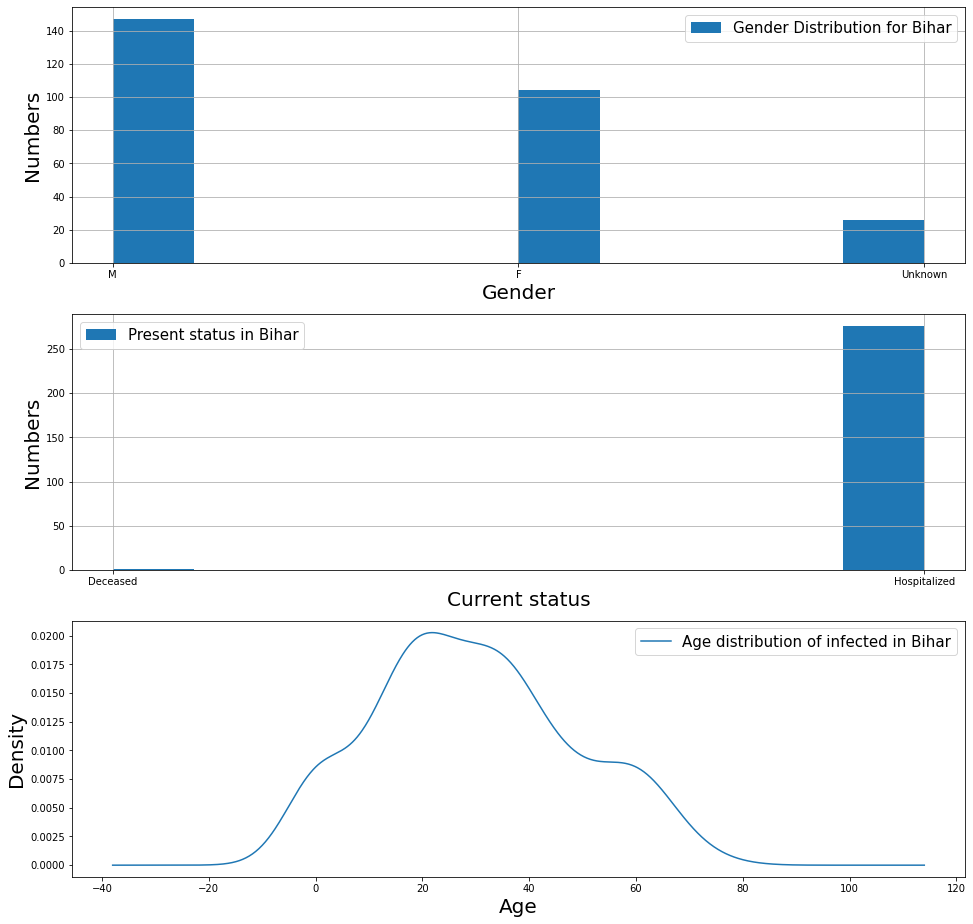

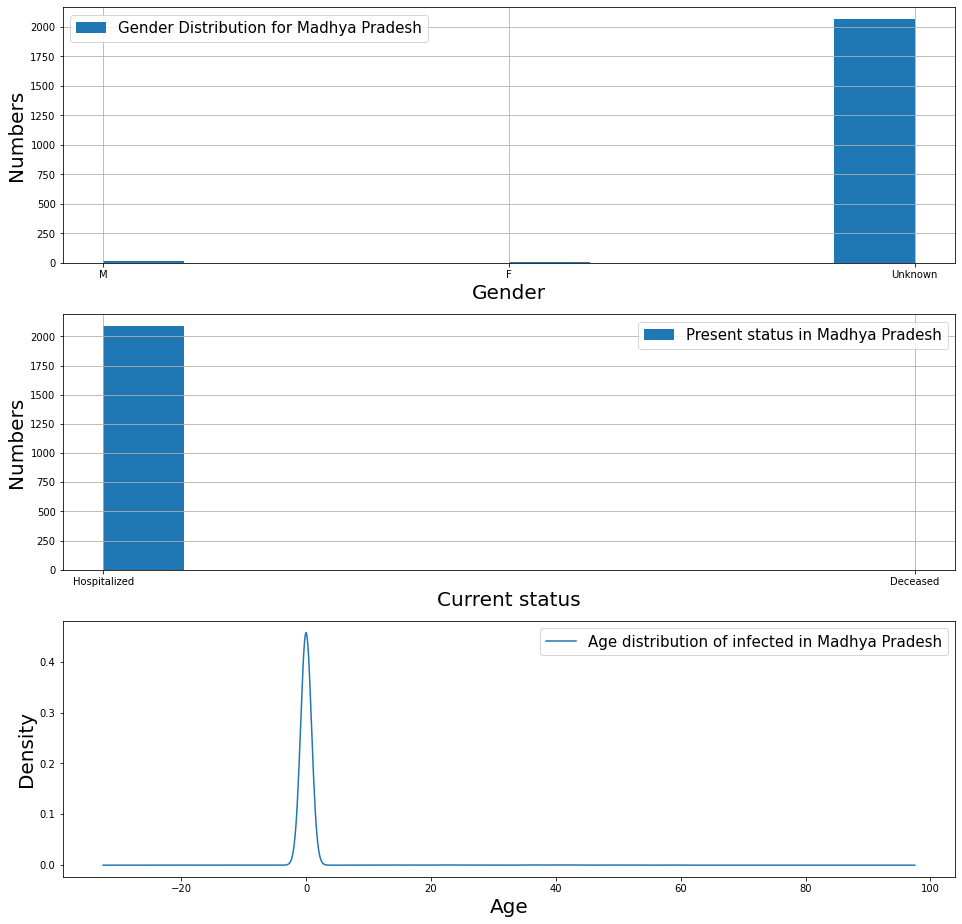

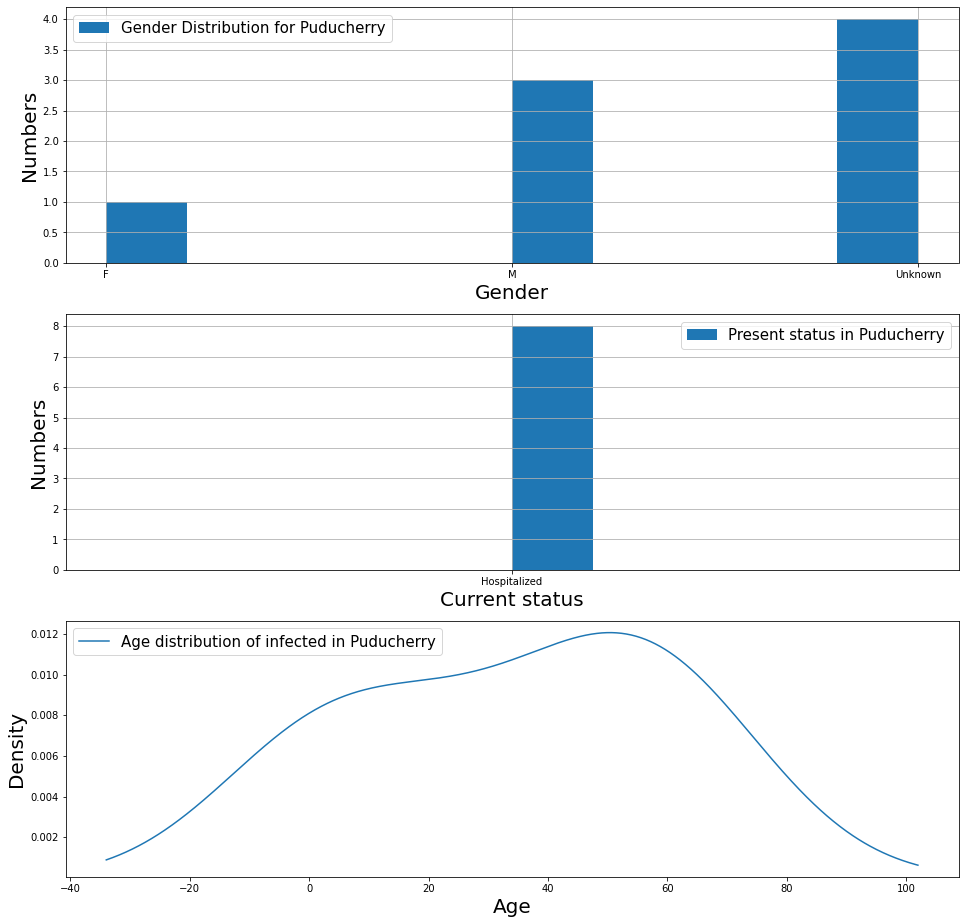

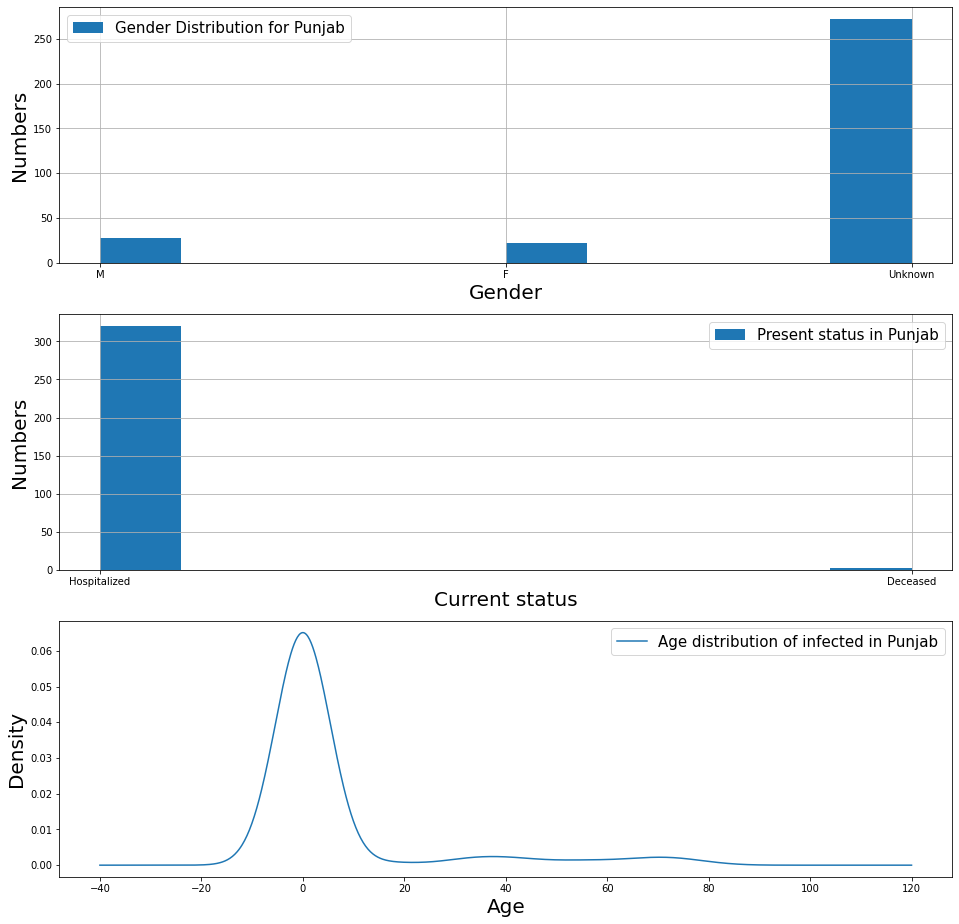

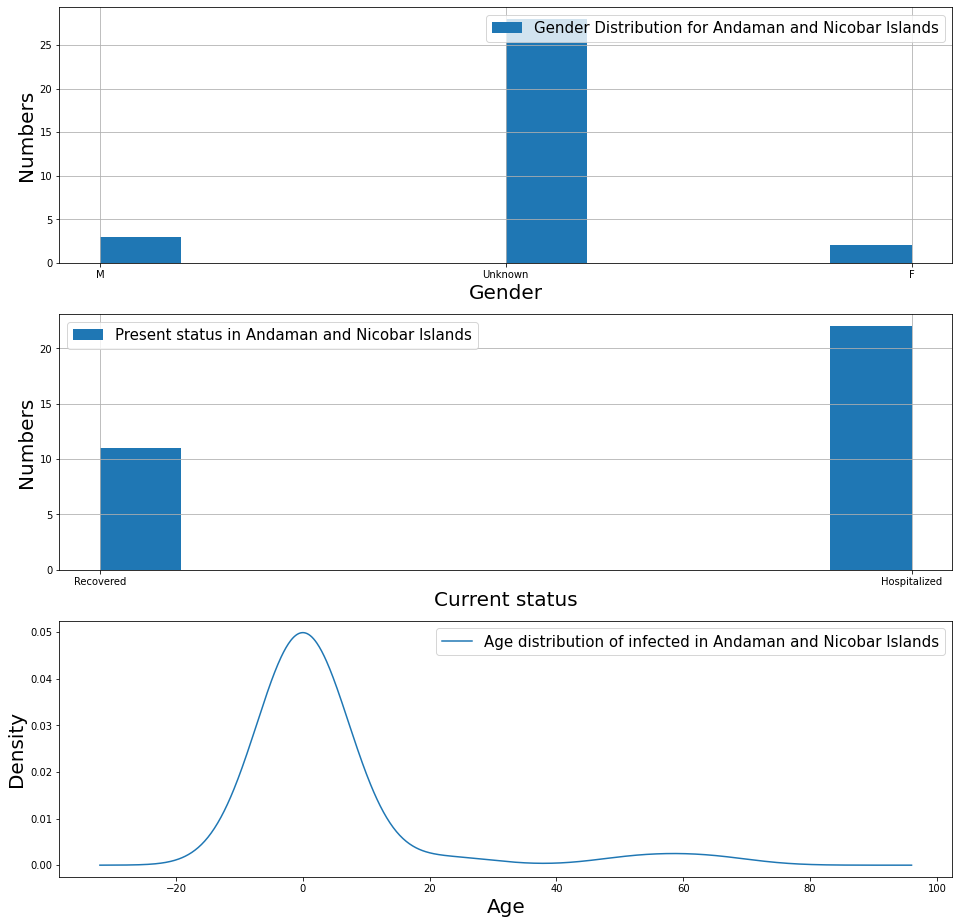

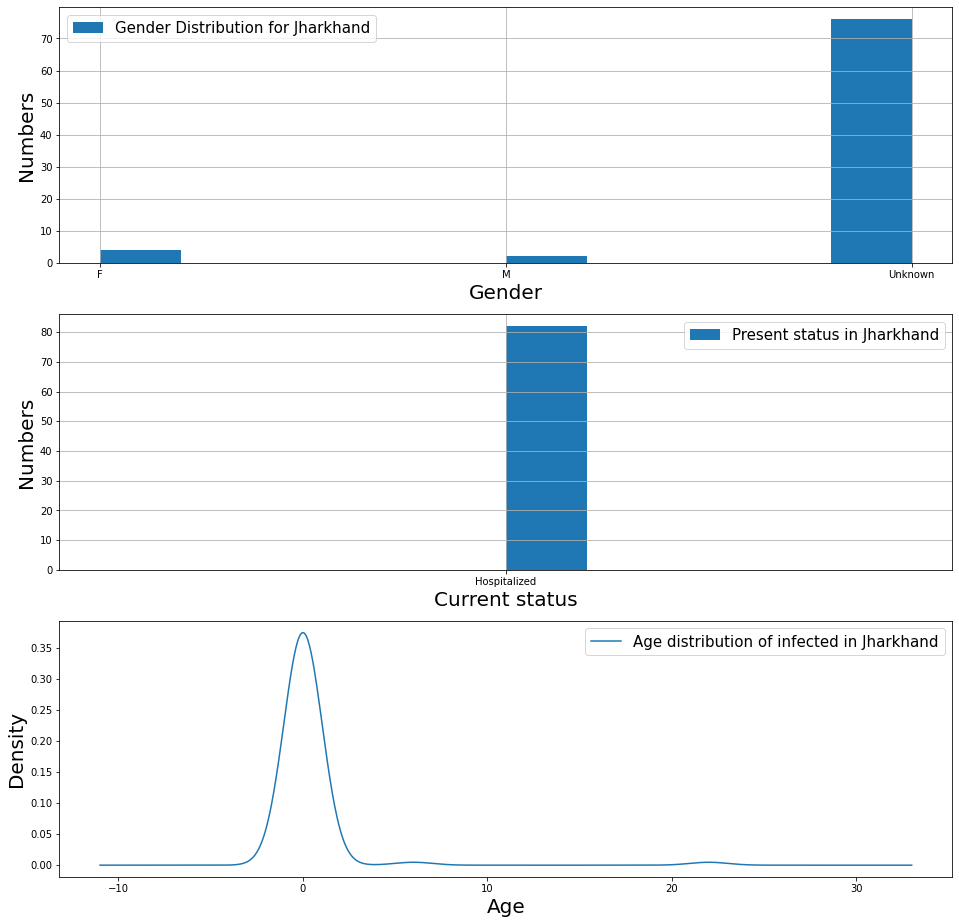

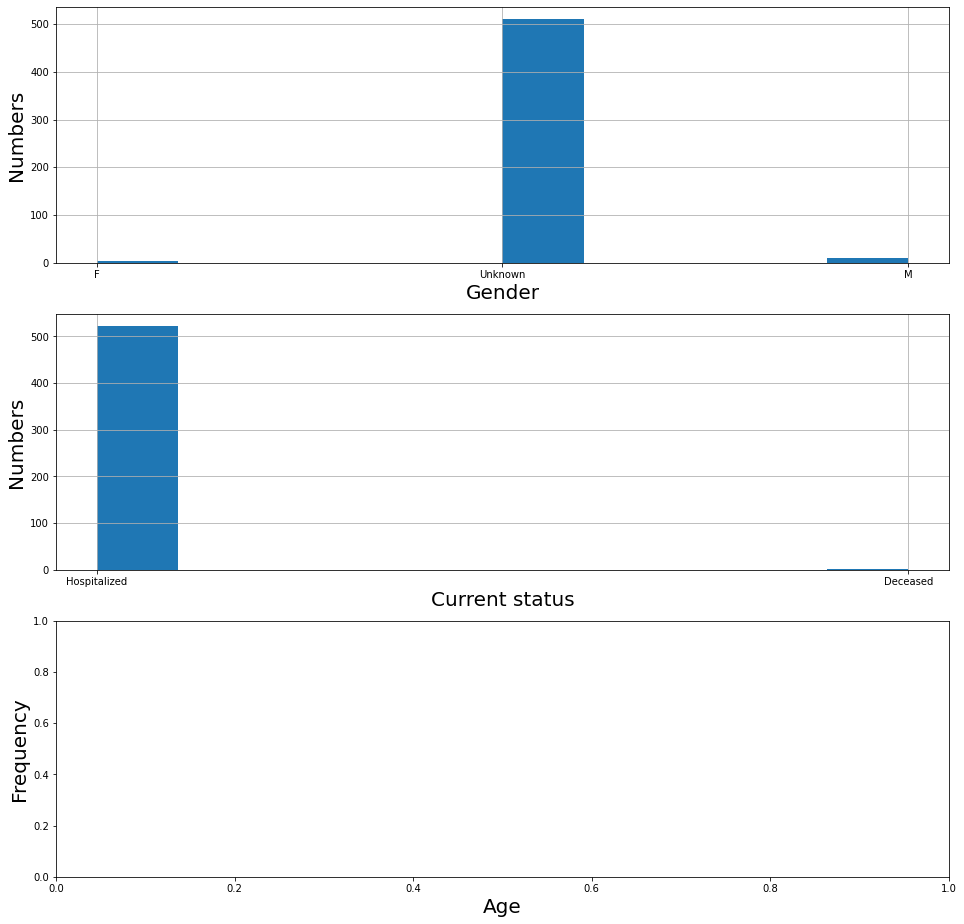

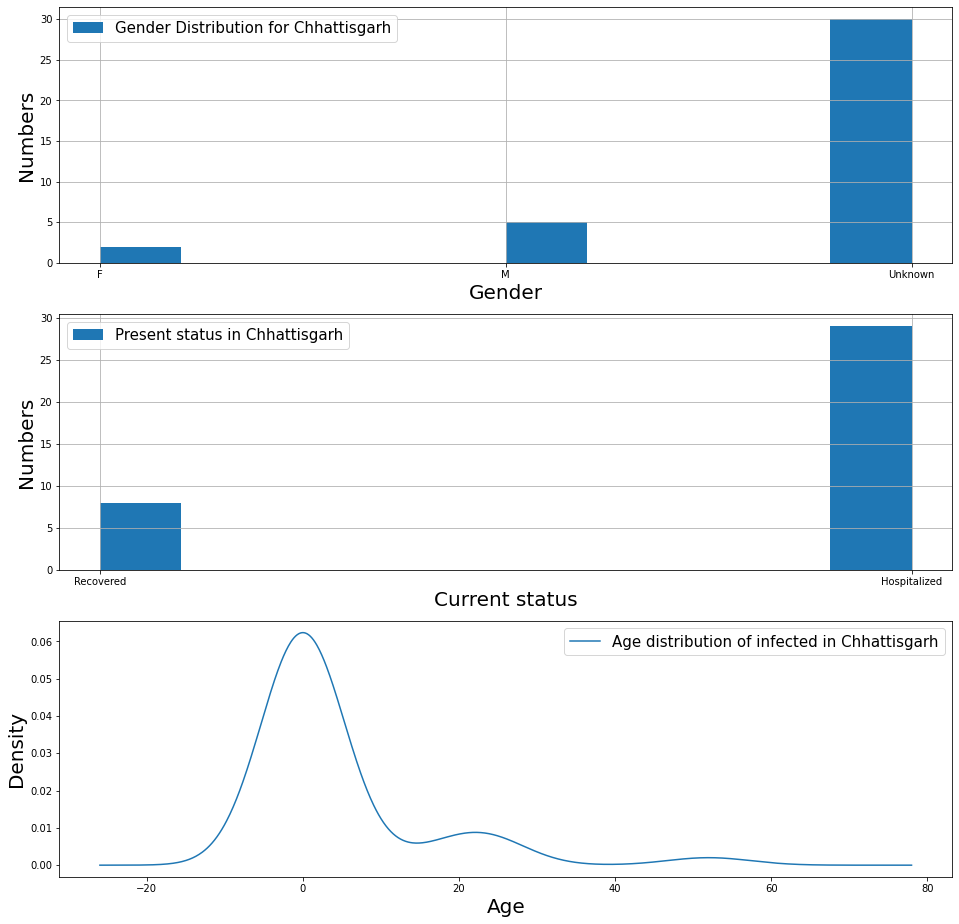

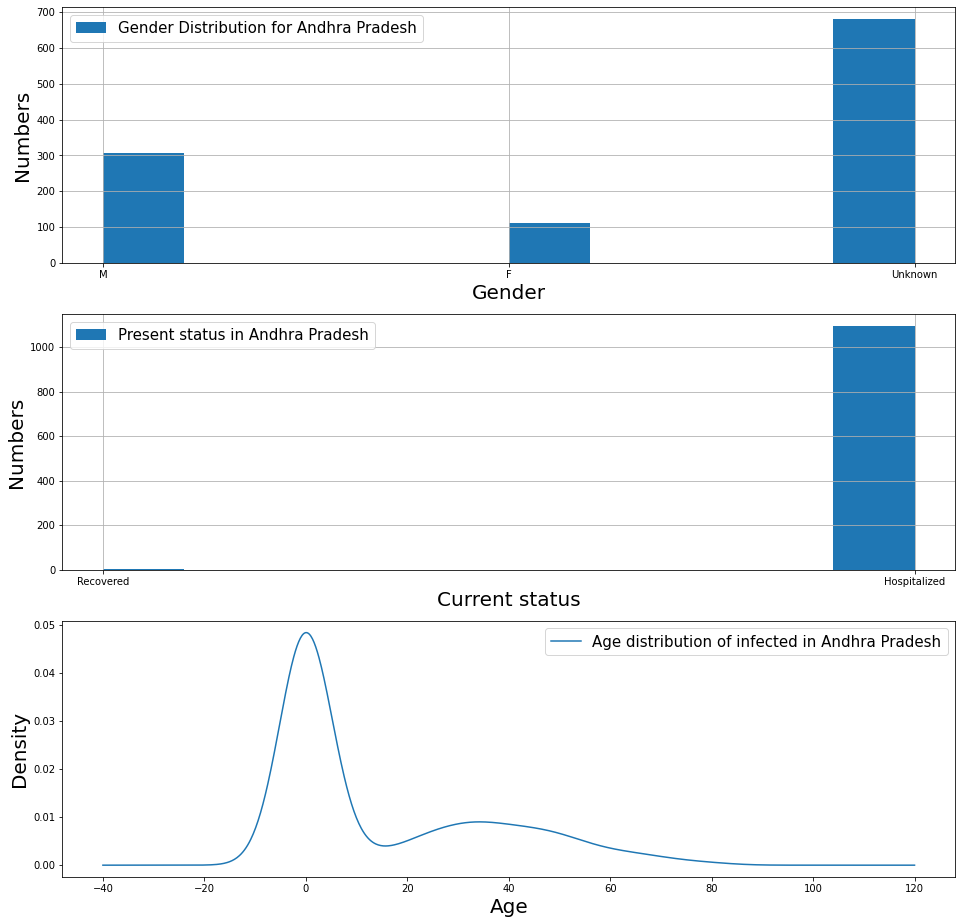

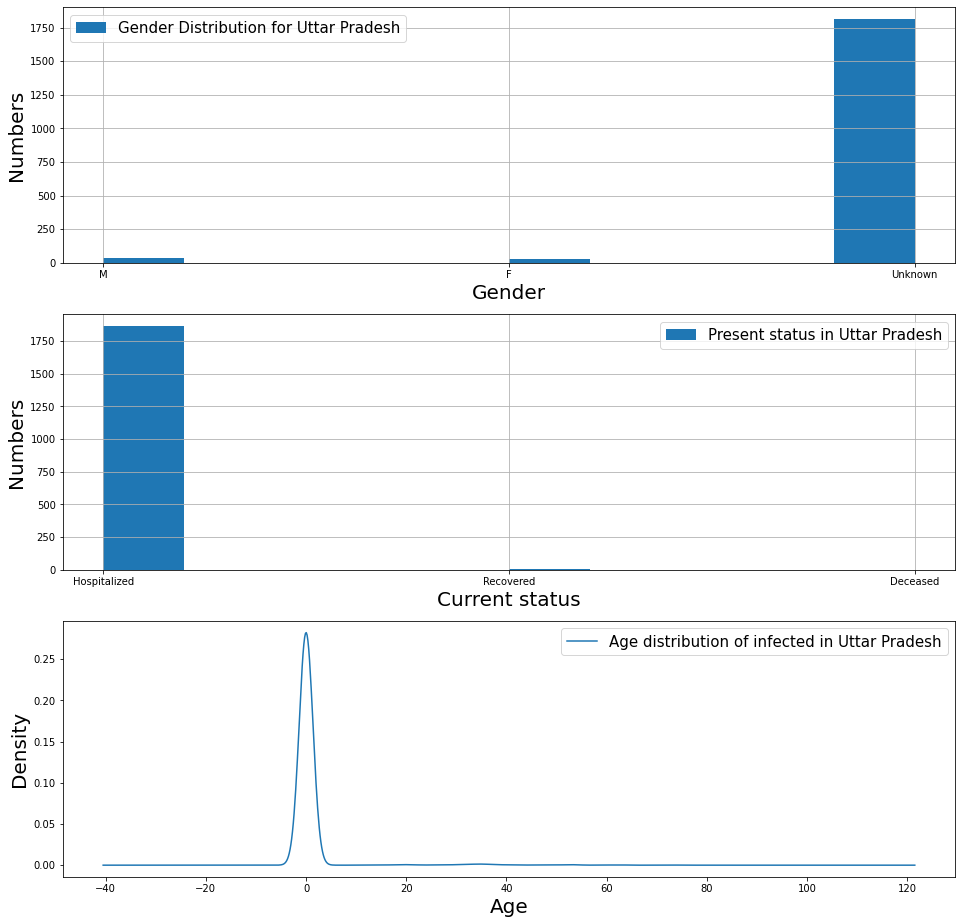

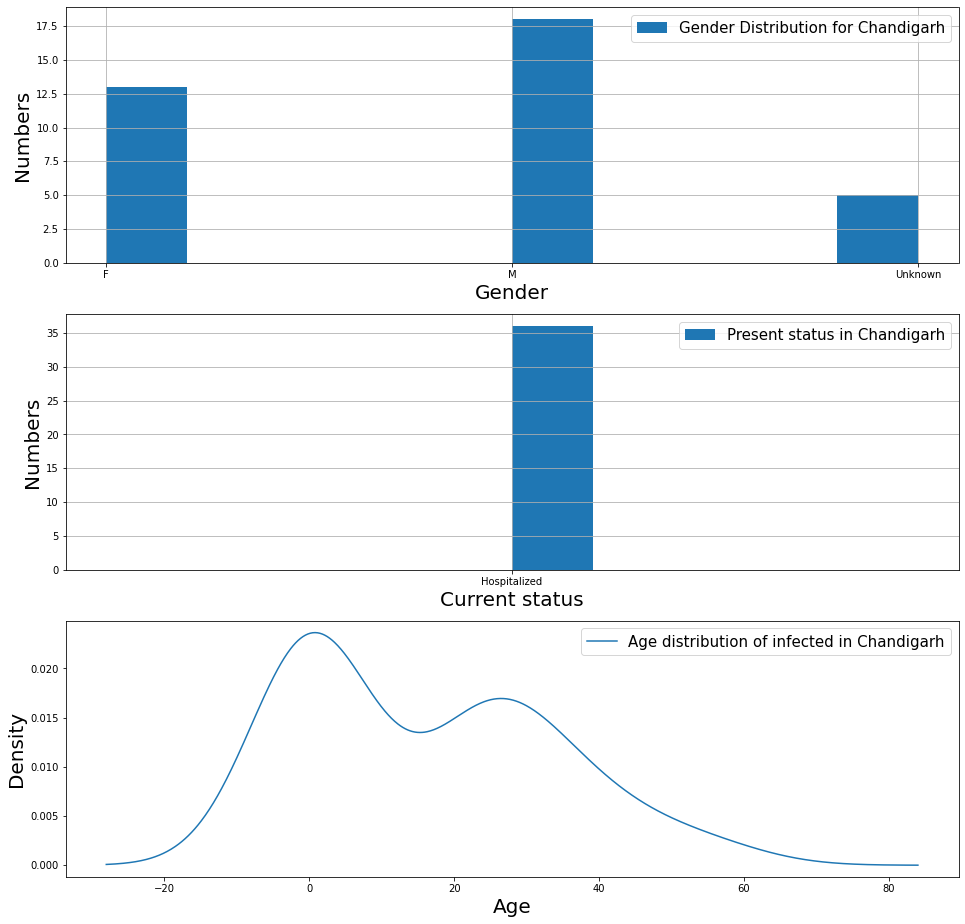

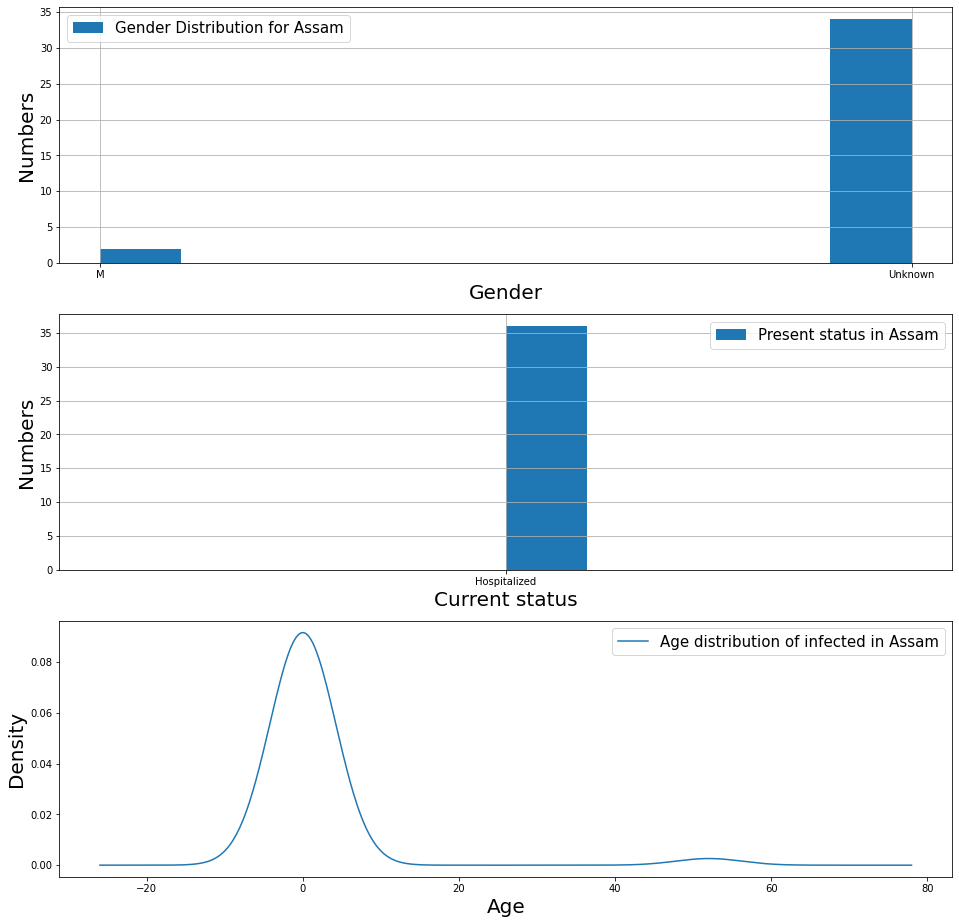

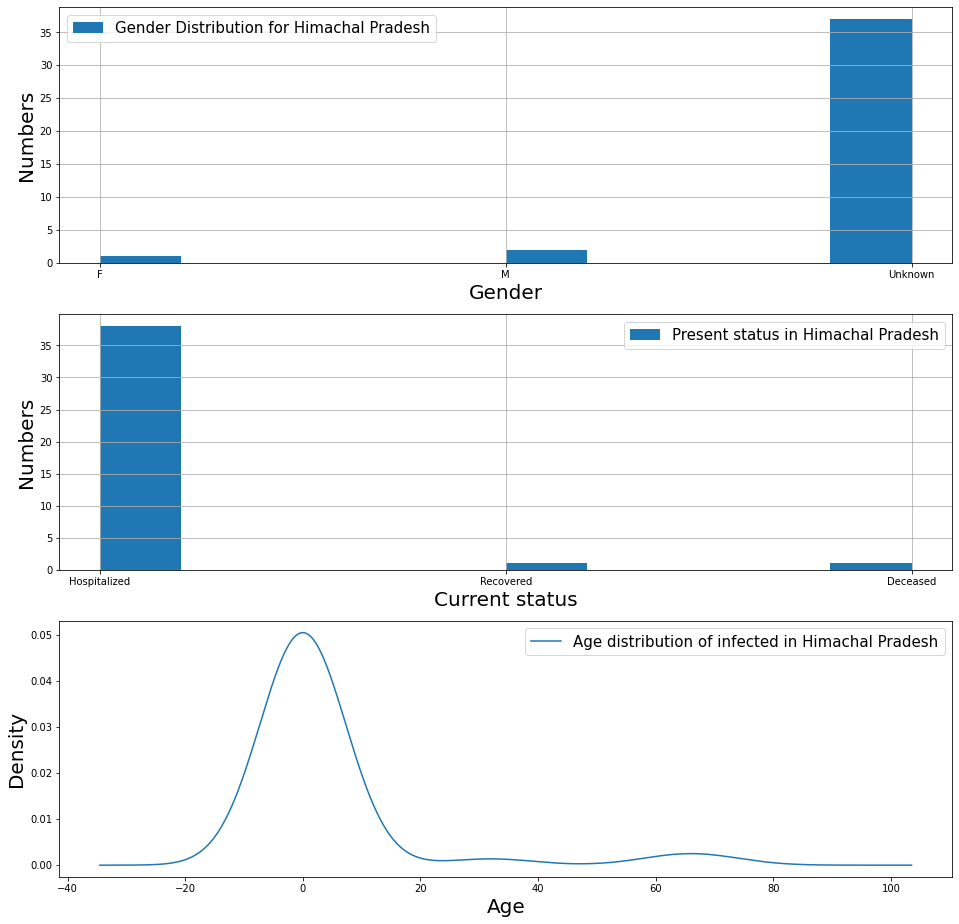

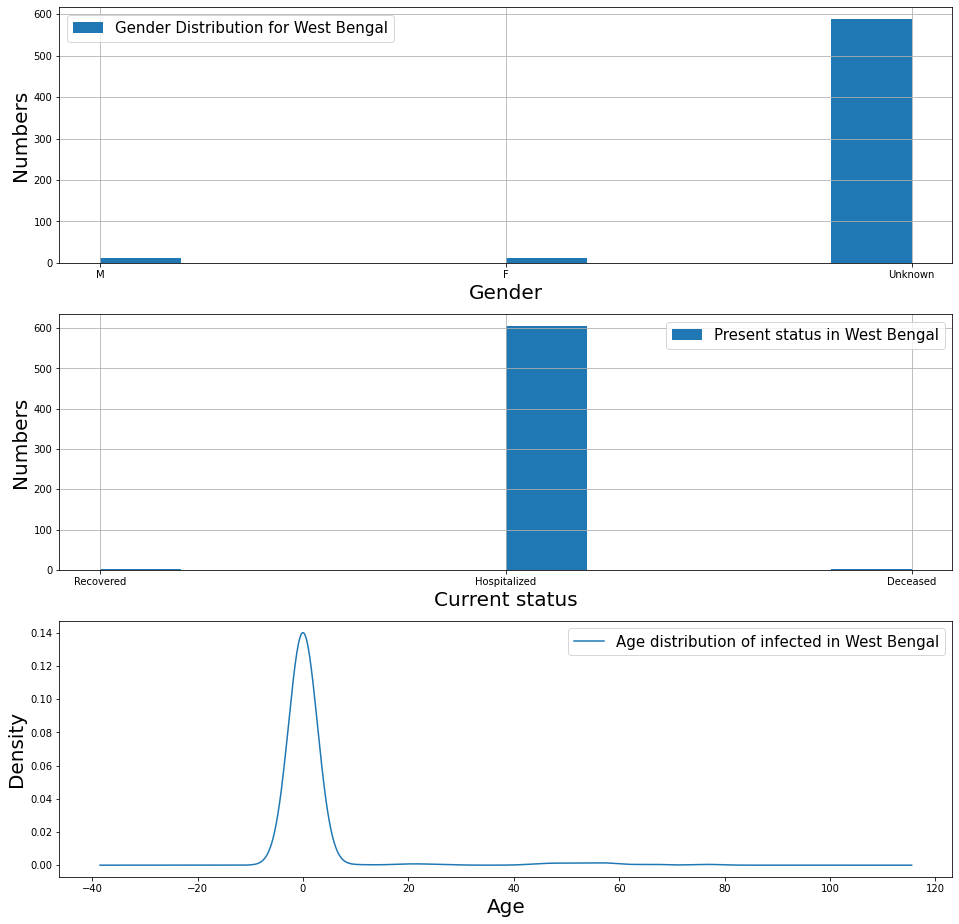

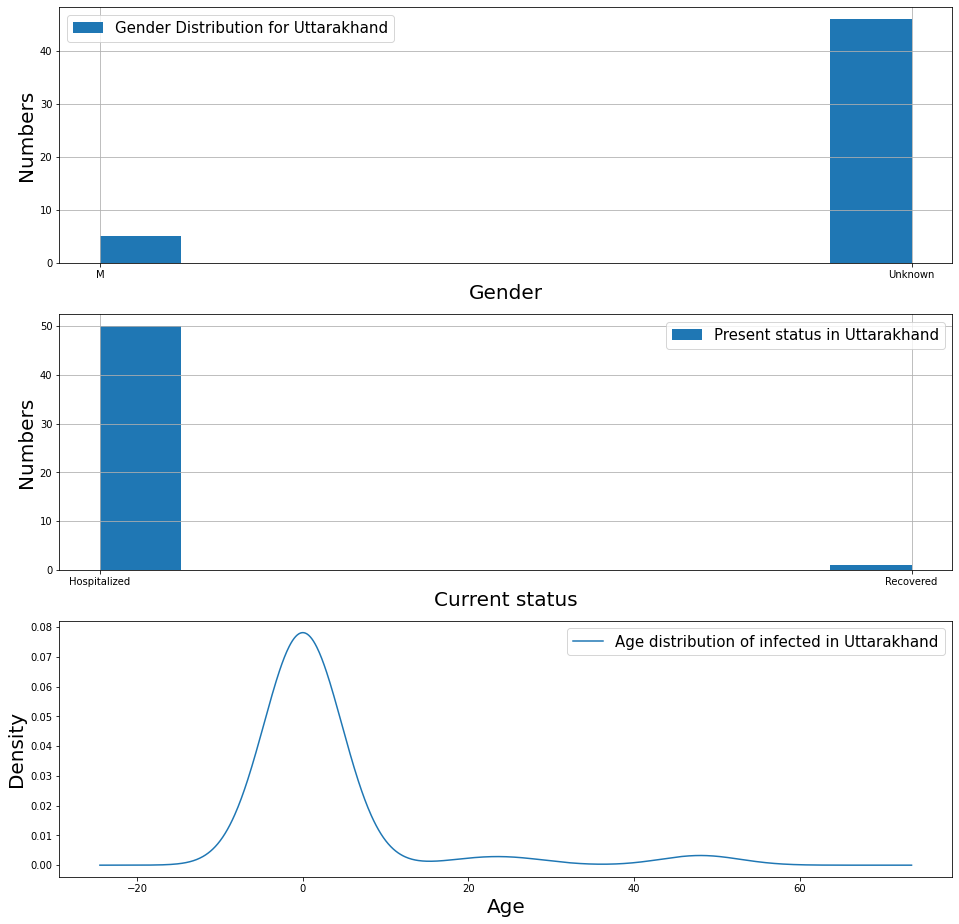

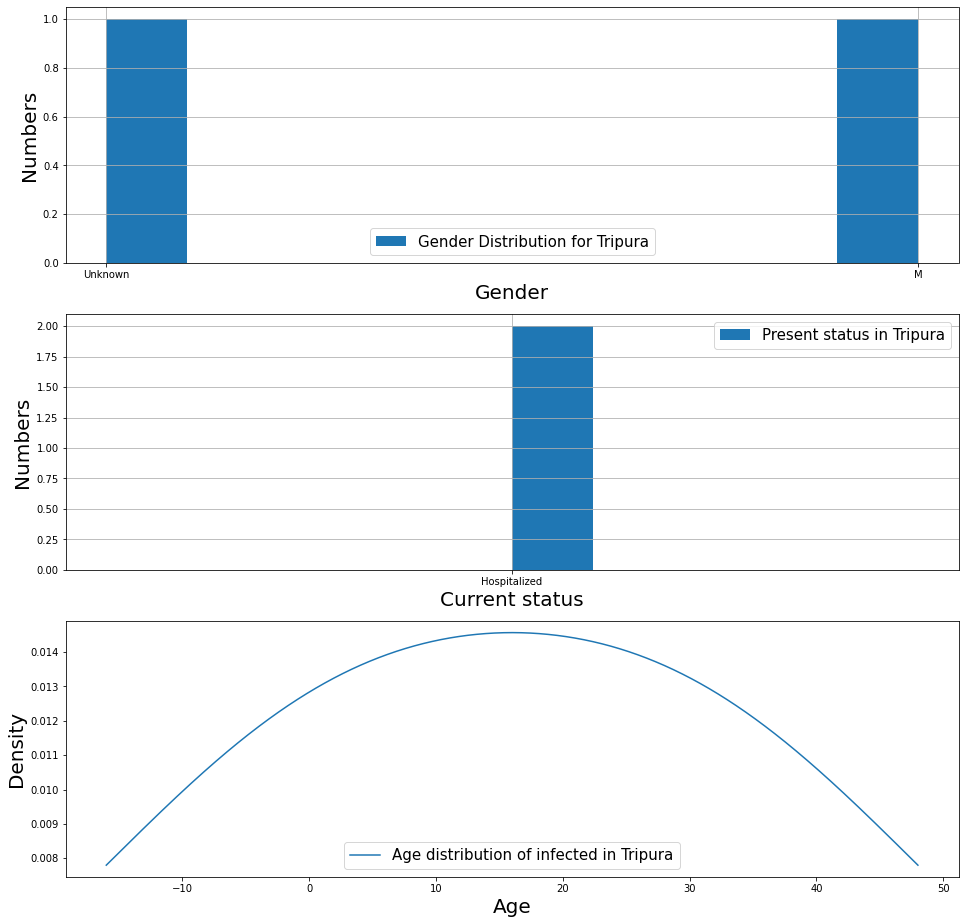

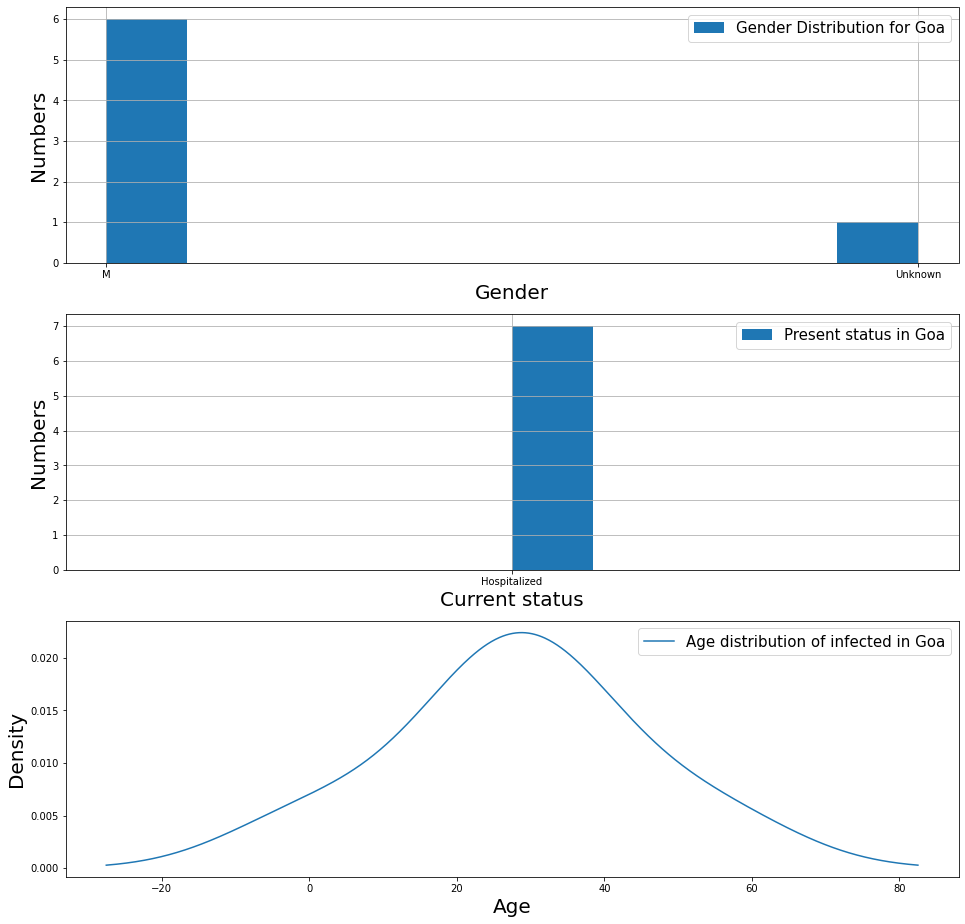

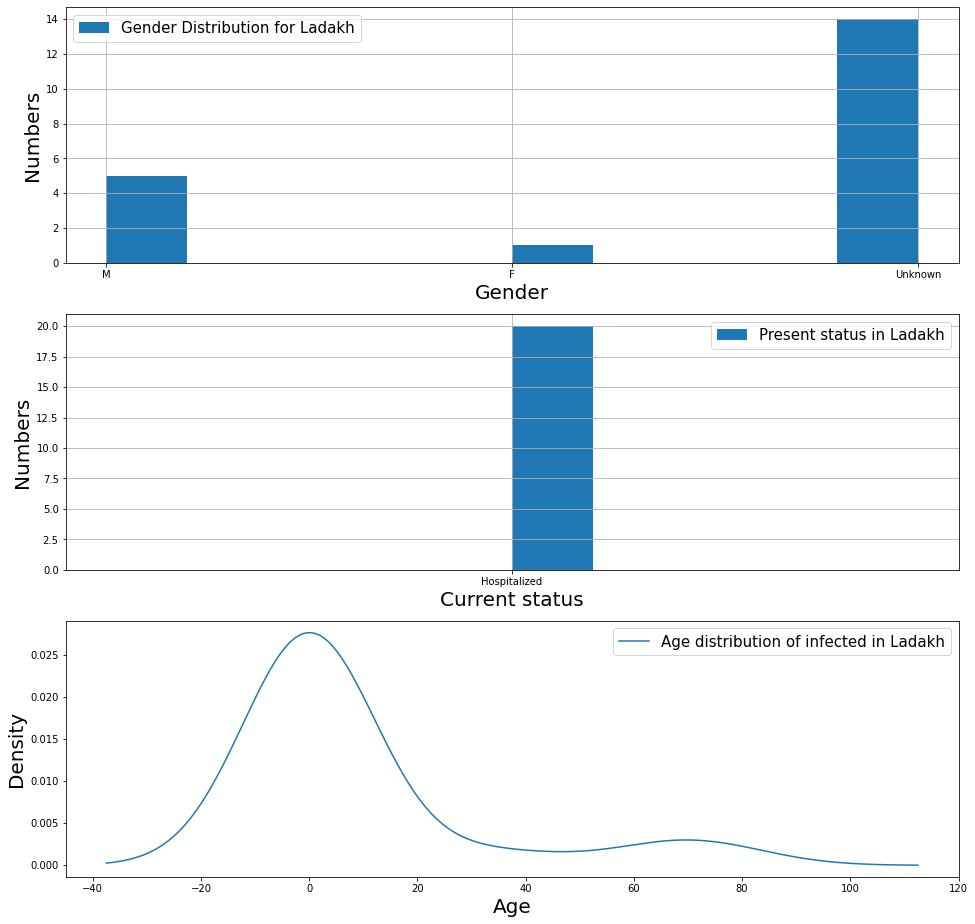

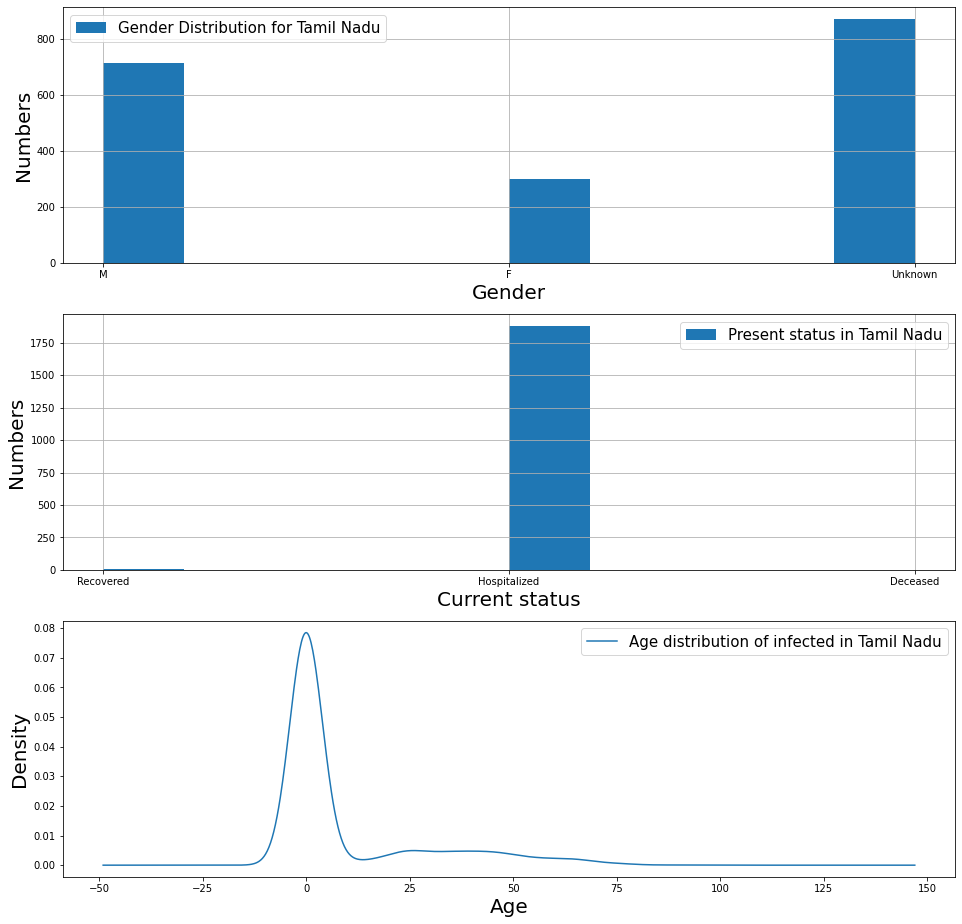

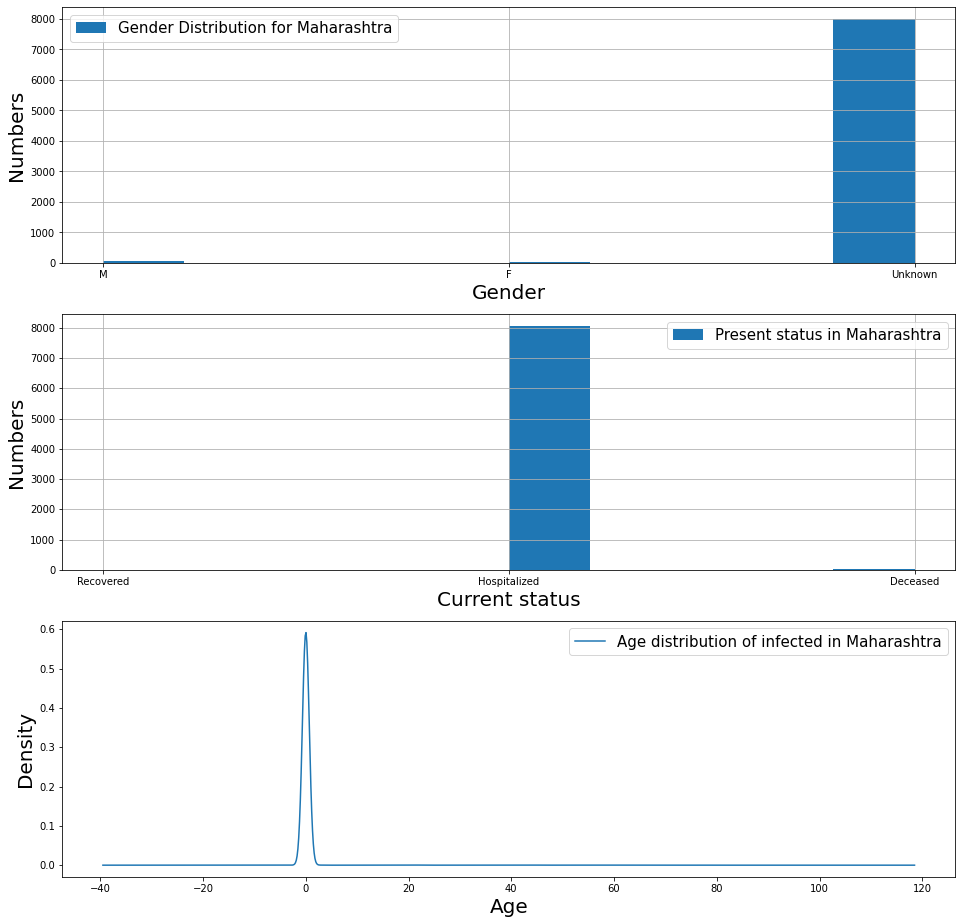

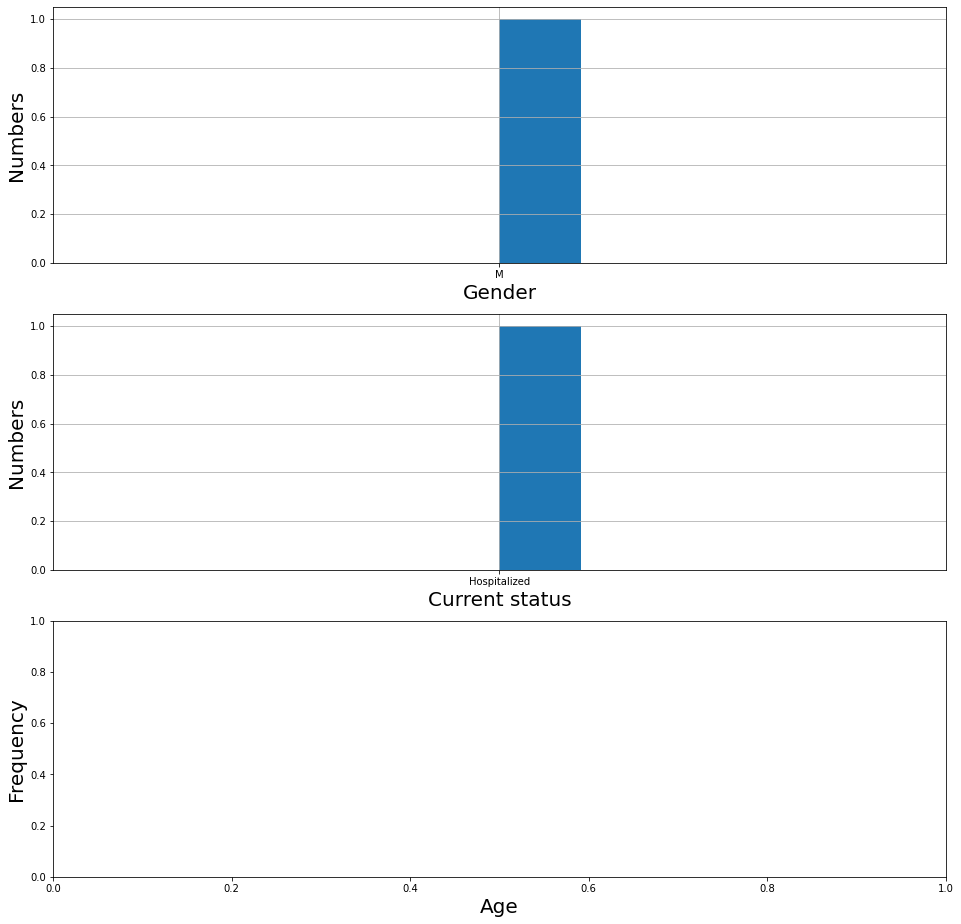

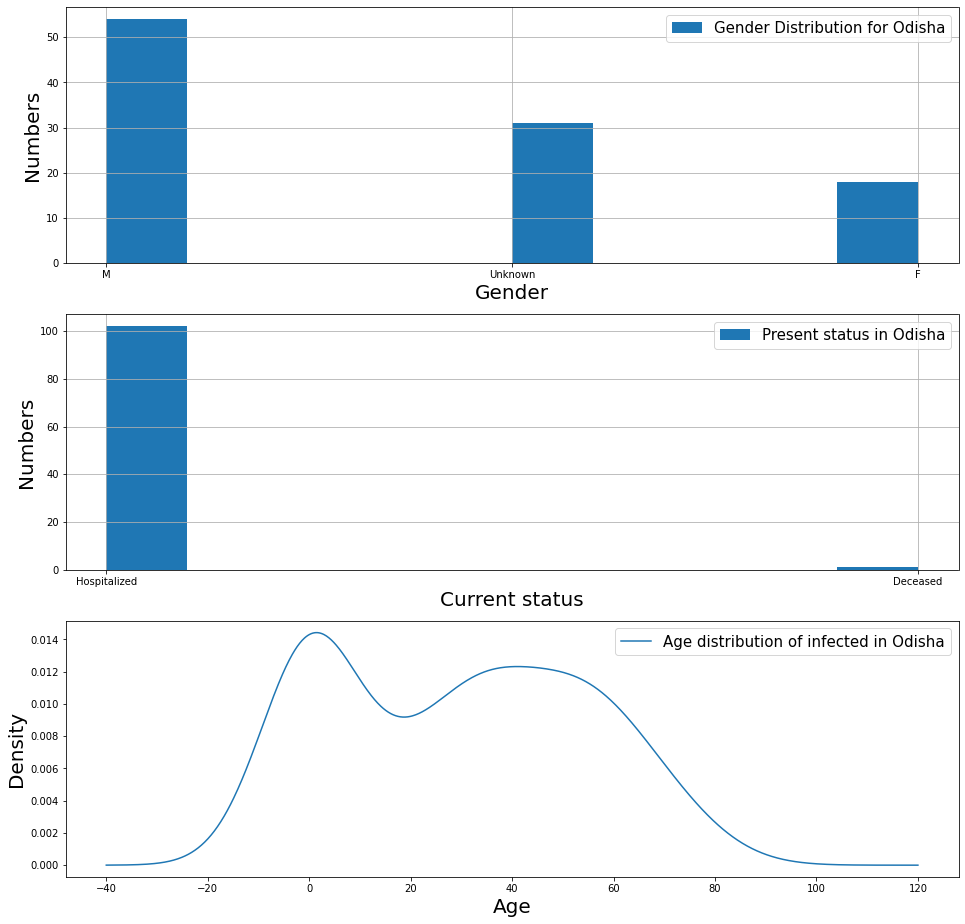

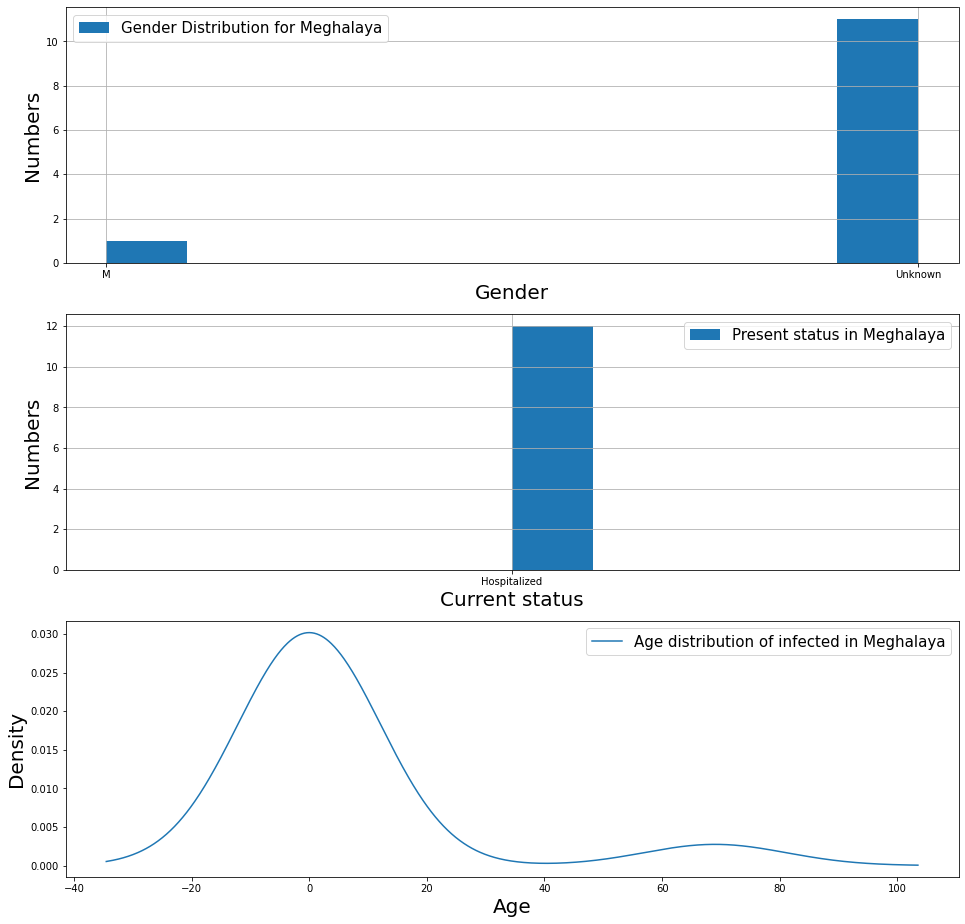

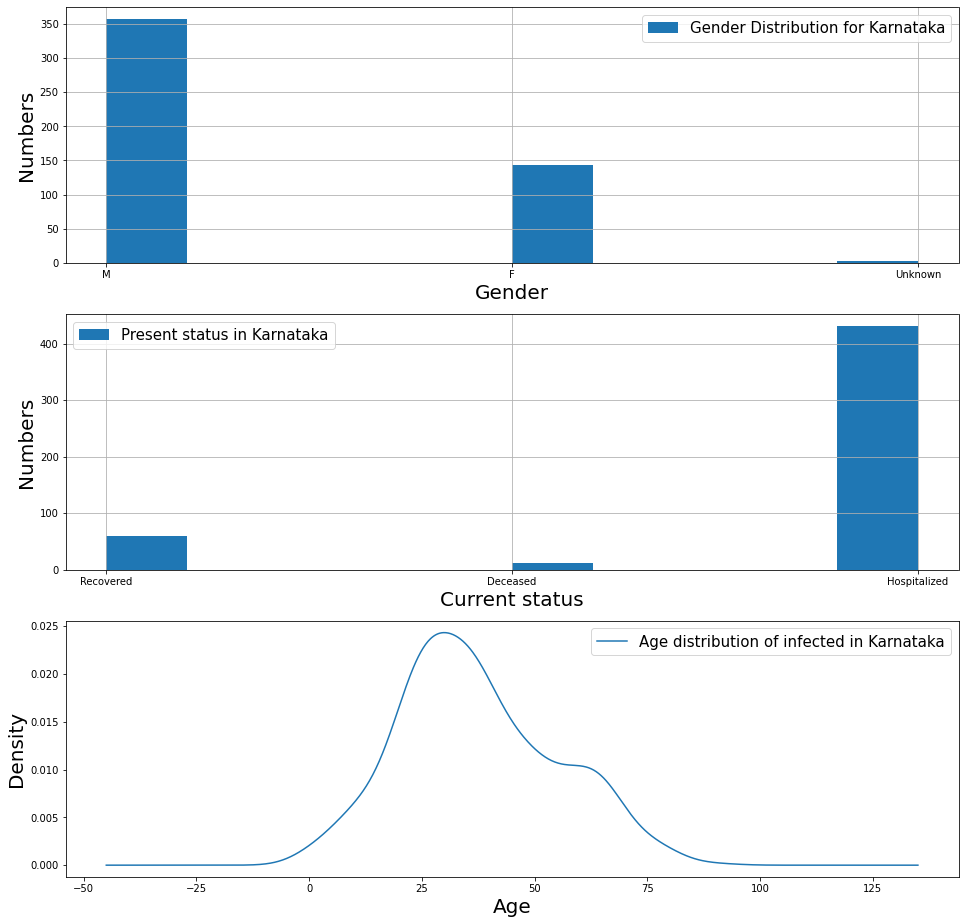

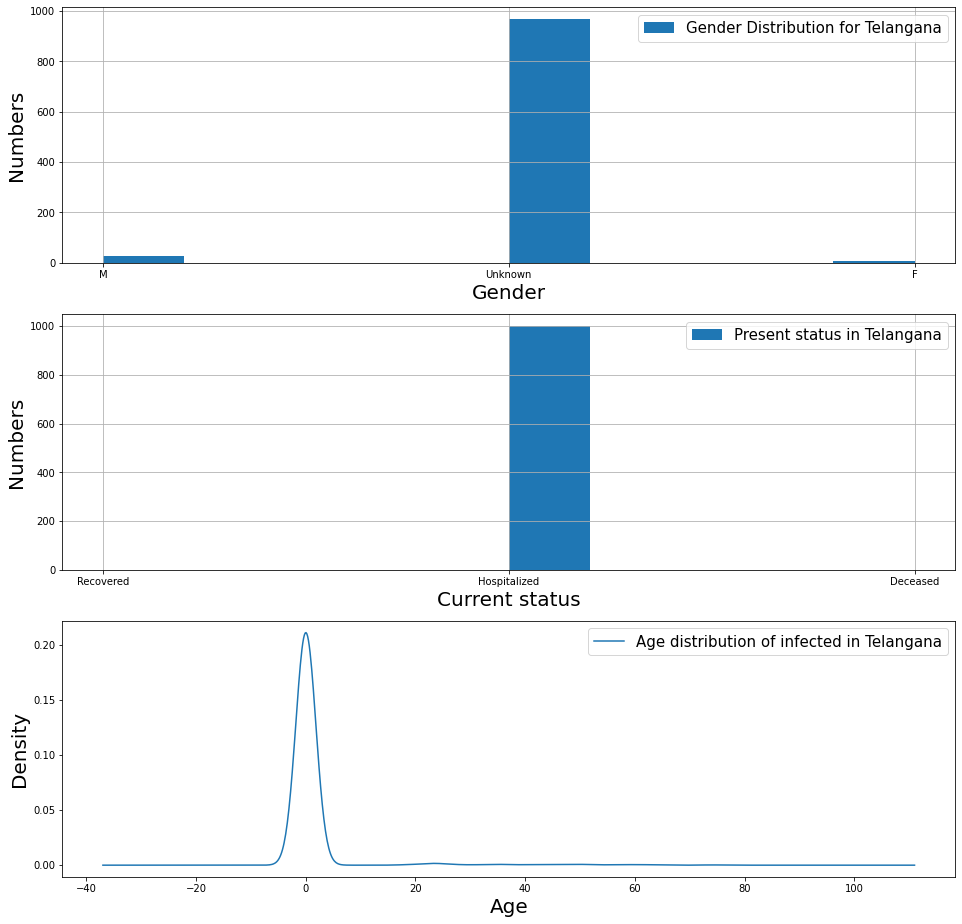

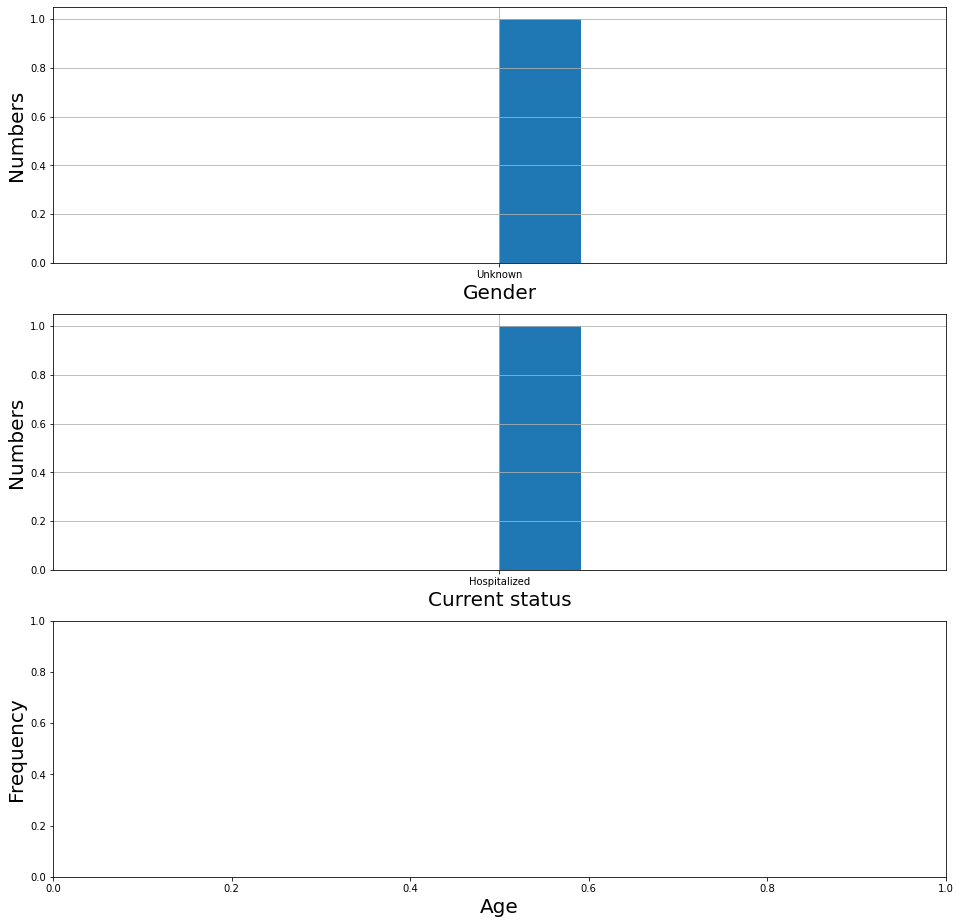

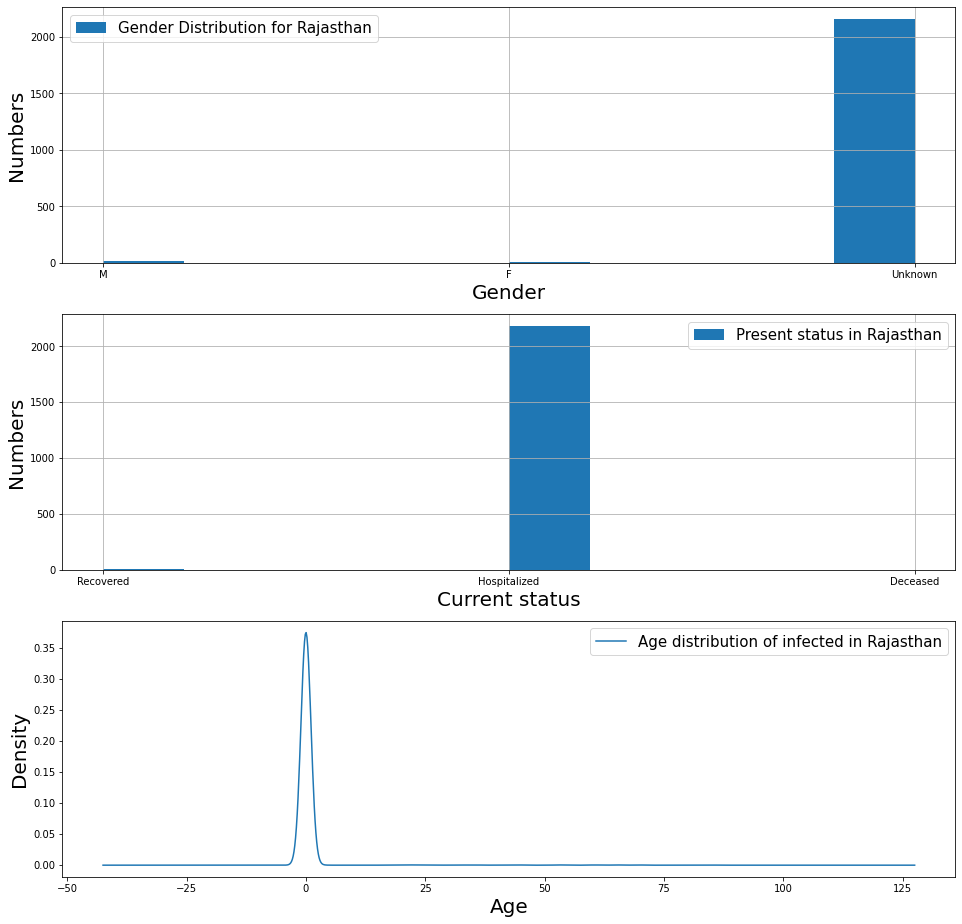

In [18]:
for state in States:
   p_state = plot_details(p_df,'detected_state',state)

In [19]:
#statewise_daily
link= 'https://api.covid19india.org/csv/latest/state_wise_daily.csv'
s_df = pd.read_csv(link)
s_df.head()

Date     Status  TT  AN  AP  AR  AS  BR  ...  RJ  SK  TN  TG  TR  UP  UT  WB
0  14-Mar-20  Confirmed  81   0   1   0   0   0  ...   3   0   1   1   0  12   0   0
1  14-Mar-20  Recovered   9   0   0   0   0   0  ...   1   0   0   0   0   4   0   0
2  14-Mar-20   Deceased   2   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
3  15-Mar-20  Confirmed  27   0   0   0   0   0  ...   1   0   0   2   0   1   0   0
4  15-Mar-20  Recovered   4   0   0   0   0   0  ...   2   0   0   1   0   0   0   0

[5 rows x 40 columns]

In [0]:
from scipy.optimize import curve_fit
state_dict = {'TT':'India', 'AN': 'Andaman & Nicobar',  'AP':'Andhra Pradesh', 'AR': 'Arunachal Pradesh', 'AS': 'Assam',
              'BR': 'Bihar', 'CH':'Chandigarh', 'CT':'Chhattisgarh', 'DN': 'Dadra and Nagar Haveli', 'DD': 'Daman and Diu',
              'DL':'Delhi', 'GA': 'Goa', 'GJ':'Gujarat', 'HR':'Haryana', 'HP':'Himachal Pradesh', 'JK':'Jammu & Kashmir',
              'JH':'Jharkhand', 'KA':'Karnataka','KL':'Kerala','LA': 'Ladakh', 'LD': 'Lakshadweep', 'MP':'Madhya Pradesh',
              'MH':'Maharastra','MN':'Manipur', 'ML':'Meghalaya', 'MZ':'Mizoram', 'NL':'Nagaland', 'OR':'Orissa', 'PY':'Puducherry',
              'PB':'Punjab', 'RJ':'Rajasthan', 'SK':'Sikkim', 'TN':'Tamil Nadu', 'TG':'Telangana', 'TR':'Tirupura', 'UP':'Uttar Pradesh',
               'UT':'Uttrakhand', 'WB':'West Bengal'}
def state_progress(dataframe, state,N):
  state_df = dataframe[["Date", "Status",state]] 
  state_confirmed = state_df[state_df['Status']=='Confirmed']
  state_confirmed.rename(columns={state: 'Confirmed'},inplace=True)
  state_confirmed.drop(['Status'], axis=1, inplace=True)
  state_recovered = state_df[state_df['Status']=='Recovered']
  state_recovered.rename(columns={state: 'Recovered'},inplace=True)
  state_recovered.drop(['Status'], axis=1, inplace=True)
  state_deceased = state_df[state_df['Status']=='Deceased']
  state_deceased.rename(columns={state: 'Deceased'},inplace=True)
  state_deceased.drop(['Status'], axis=1, inplace=True)
  state_new = pd.merge(state_recovered,state_confirmed, how='outer' )
  state_new = pd.merge(state_new, state_deceased, how='outer' )
  ll = [state]
  try:
    state_new.replace('', 0, inplace=True)
    state_new['Confirmed'] = state_new['Confirmed'].astype(str).astype(int)
    state_new['Deceased'] = state_new['Deceased'].astype(str).astype(int)
    state_new['Recovered'] = state_new['Recovered'].astype(str).astype(int)
    state_new['Date']= pd.to_datetime(state_new['Date']) 
    state_new['Date'] = state_new['Date'].dt.date
    state_new['Total_Confirmed'] = state_new[['Confirmed']].cumsum()
    state_new['Total_Recovered'] = state_new[['Recovered']].cumsum()
    state_new['Total_Deceased'] = state_new[['Deceased']].cumsum()

    x=np.array(range(state_new.shape[0]))
    y=state_new['Total_Confirmed'].values
    #print(len(x))

 
    def func(x,a,b):
      return a*2**(x/b)
  
    try:
        popt, pcov = curve_fit(func,xdata=x,ydata=y)
    except:
        popt = np.array([0,0])
    
  
    #print(state, popt)
    orig = state_new['Total_Confirmed'].tolist()
    predictions = []
    for i in range(N):
      yfit = popt[0]*2**(i/popt[1])
      predictions.append(yfit)

    fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    ax1.set_ylabel('Total infected',fontsize=20)
    ax1.set_xlabel('Days',fontsize=20)
    ax1.plot(orig,'--o',ms=10,label='Real Data in '+ state_dict[state])
    #ax1.plot(yfit,'-',label=f'Exponential fit')
    plt.plot(predictions, label='predictions; doubling time in days: '+ str(popt[1]))
    ax1.legend(fontsize=15)
    return [state, state_dict[state],popt[0], popt[1]] #state_new
  except:
    print('Error in '+ state+ ' database')
    return [state, state_dict[state],-1, -1] #state_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Error in MP database


0                       1             2          3
0   TT                   India  6.479478e+02   7.773680
1   AN       Andaman & Nicobar  1.653065e+00  10.417983
2   AP          Andhra Pradesh  3.511559e+01   8.553810
3   AR       Arunachal Pradesh  1.915187e-01  15.246446
4   AS                   Assam  5.121147e+00  13.436357
5   BR                   Bihar  1.959065e+00   6.099219
6   CH              Chandigarh  5.385876e+00  16.280339
7   CT            Chhattisgarh  3.549985e+00  11.509411
8   DN  Dadra and Nagar Haveli  4.755077e-24   1.000000
9   DD           Daman and Diu  4.755077e-24   1.000000
10  DL                   Delhi  9.311237e+01   8.459623
11  GA                     Goa  2.051935e+00  19.945309
12  GJ                 Gujarat  1.380222e+01   5.346385
13  HR                 Haryana  2.714556e+01  11.777927
14  HP        Himachal Pradesh  4.165056e+00  11.826812
15  JK         Jammu & Kashmir  2.241918e+01   9.239896
16  JH               Jharkhand  6.267572e-01   6.158689
17  KA               Karnataka  3.397841e+01  10.631416
18  KL                  Kerala  1.064376e+02  18.335645
19  LA                  Ladakh  7.905755e+00  30.154263
20  LD             Lakshadweep  4.755077e-24   1.000000
21  MP          Madhya Pradesh -1.000000e+00  -1.000000
22  MH              Maharastra  8.768305e+01   6.509438
23  MN                 Manipur  6.069396e-01  20.493142
24  ML               Meghalaya  1.229595e-01   6.122662
25  MZ                 Mizoram  4.068124e-01  26.077937
26  NL                Nagaland  4.755077e-24   1.000000
27  OR                  Orissa  5.402006e+00   9.828574
28  PY              Puducherry  1.387533e+00  15.586236
29  PB                  Punjab  1.868077e+01  10.091556
30  RJ               Rajasthan  4.960150e+01   7.602425
31  SK                  Sikkim  4.755077e-24   1.000000
32  TN              Tamil Nadu  1.105012e+02   9.993377
33  TG               Telangana  6.593982e+01  10.247704
34  TR                Tirupura  1.721061e-01  10.778676
35  UP           Uttar Pradesh  3.151293e+01   7.172063
36  UT              Uttrakhand  5.830021e+00  12.808507
37  WB             West Bengal  6.907040e+00   6.595582

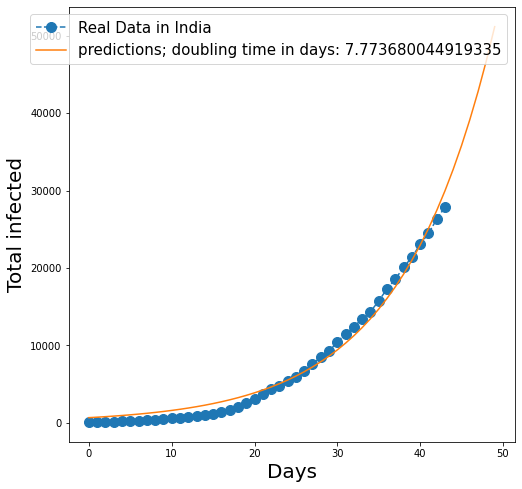

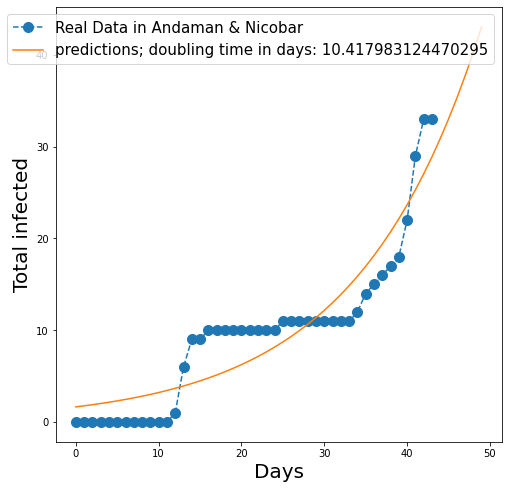

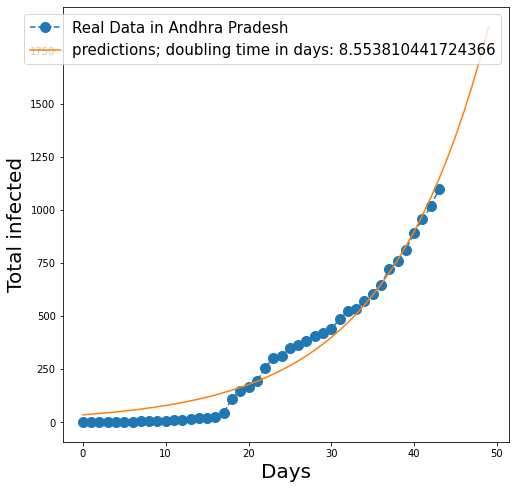

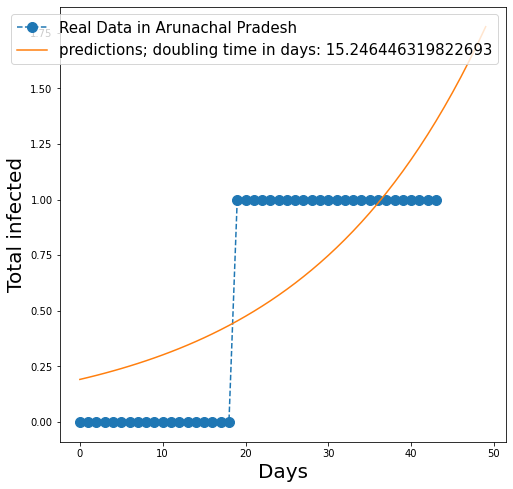

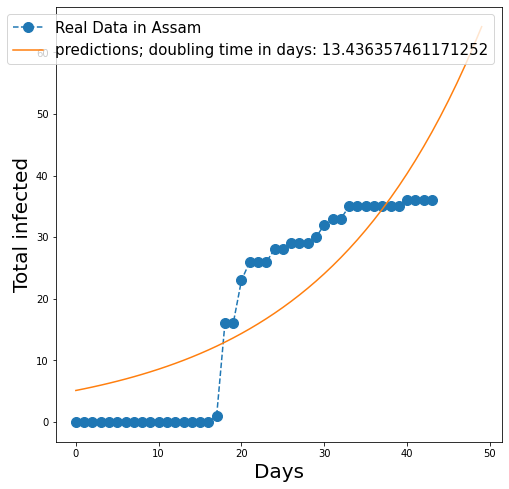

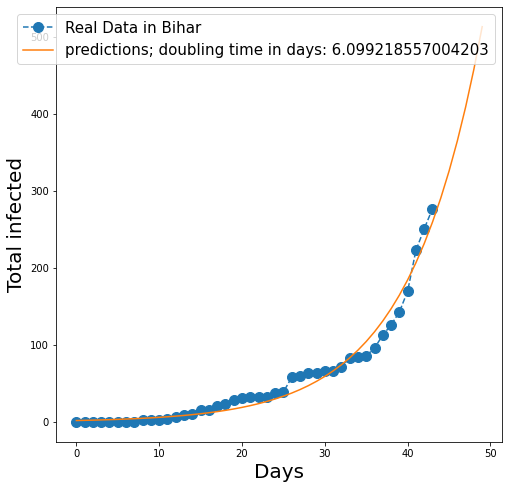

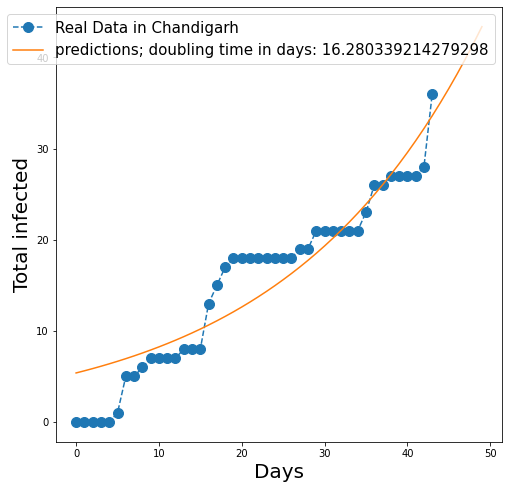

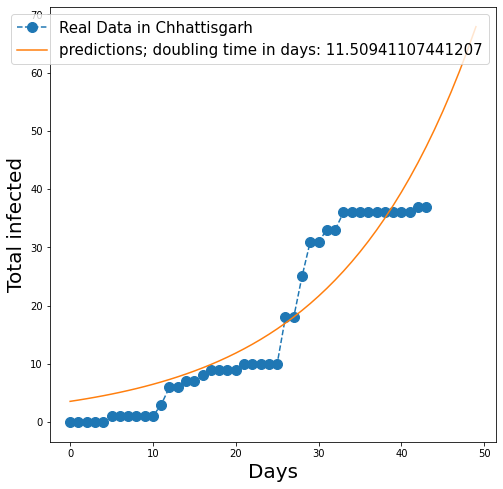

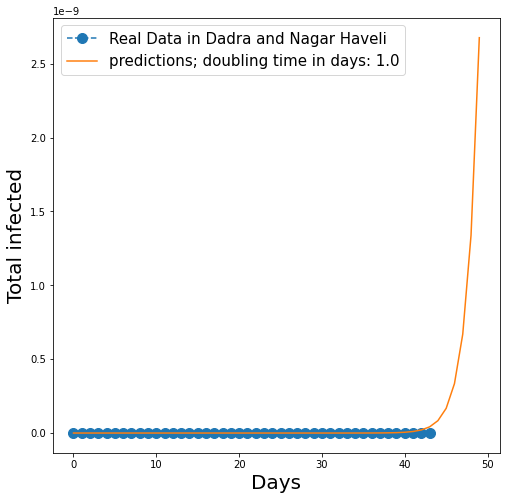

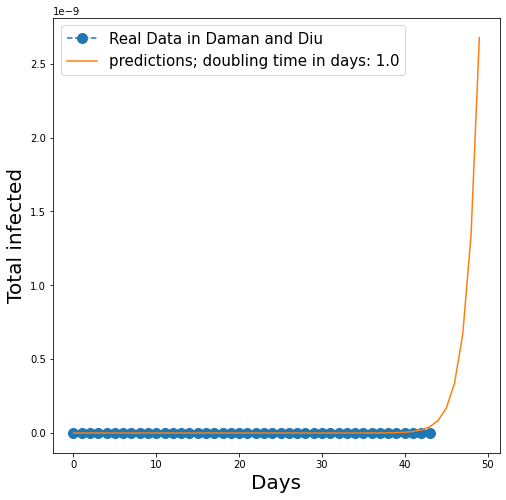

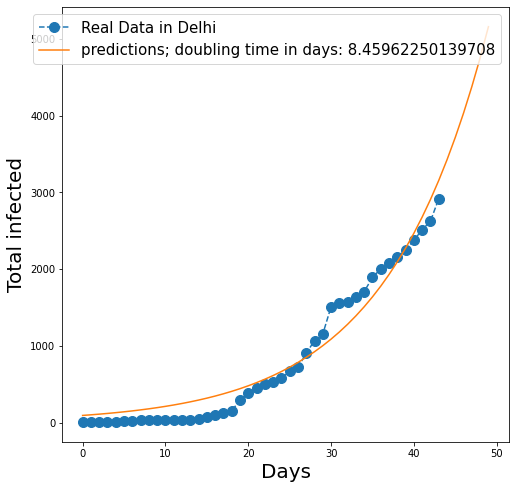

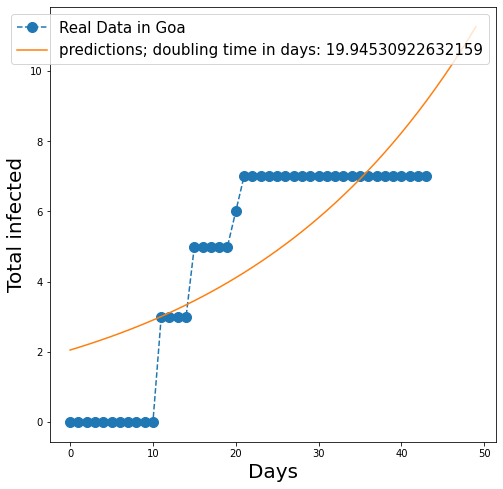

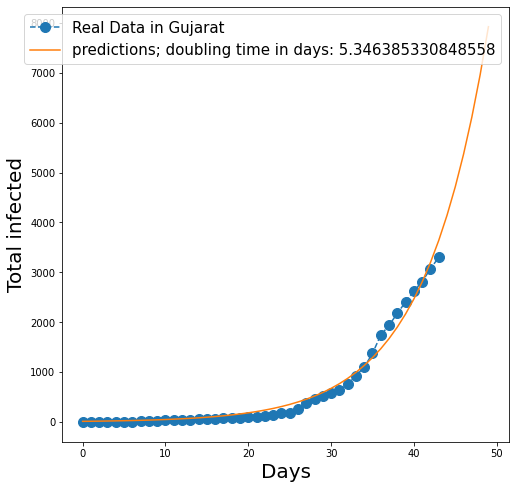

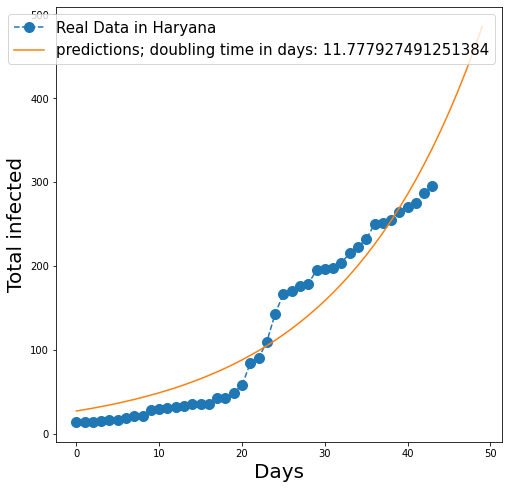

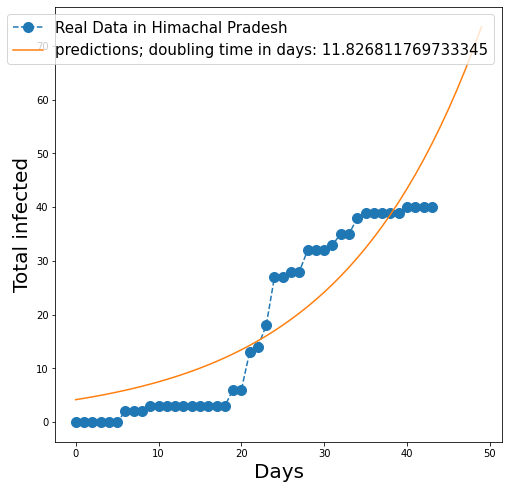

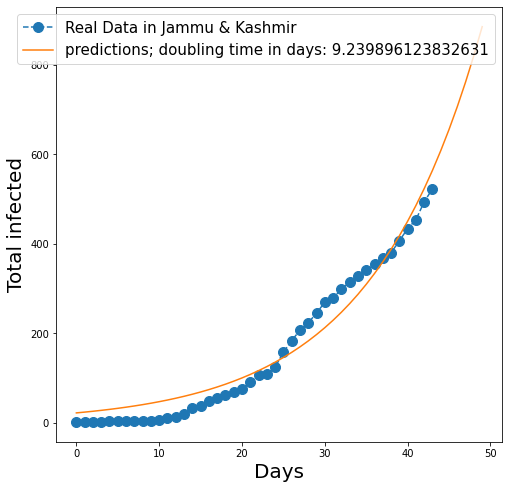

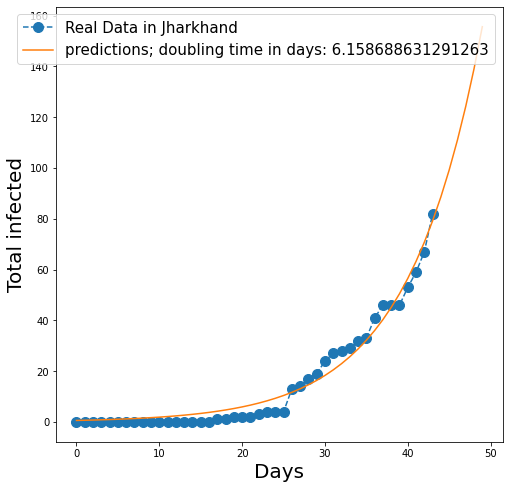

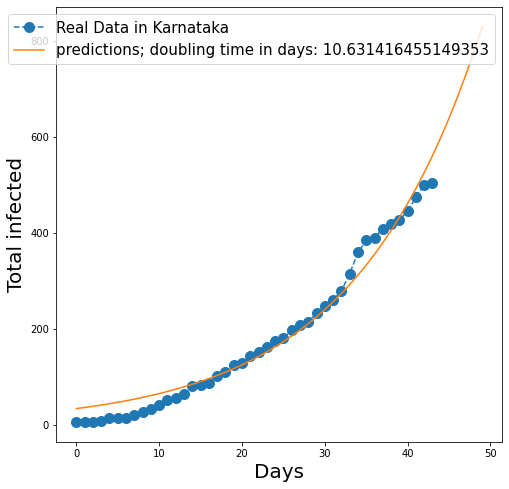

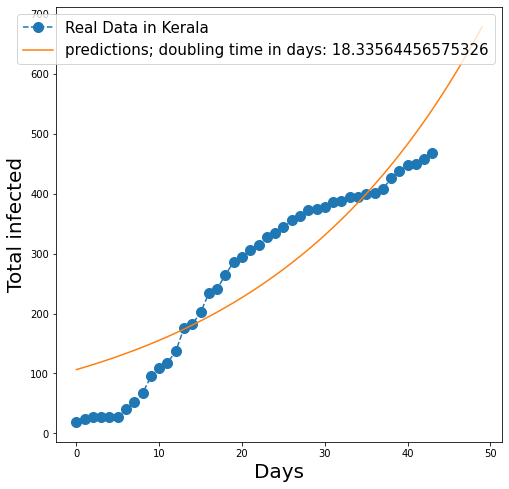

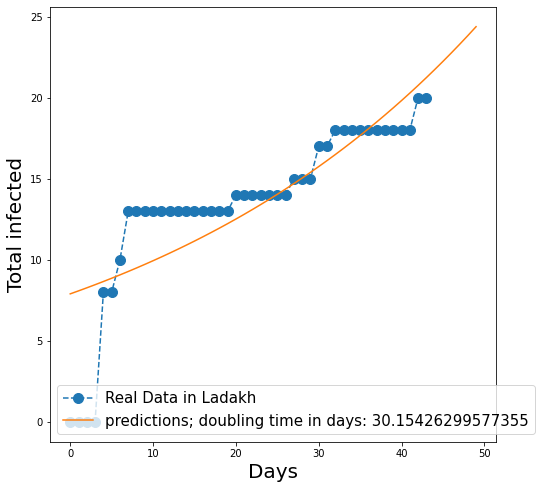

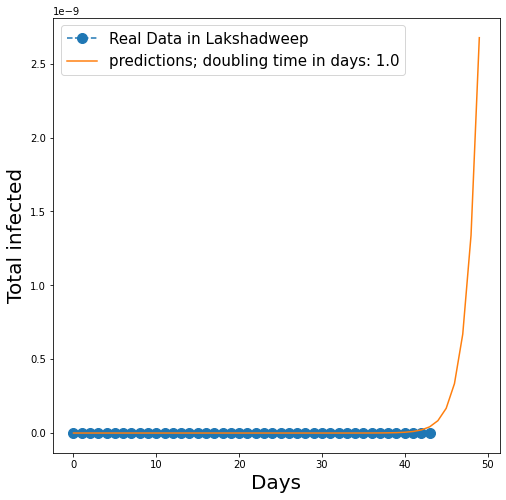

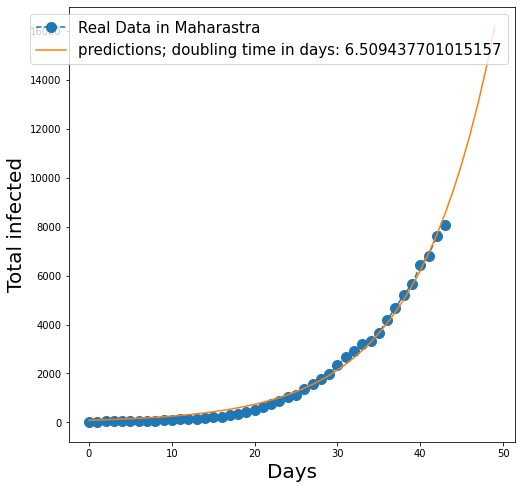

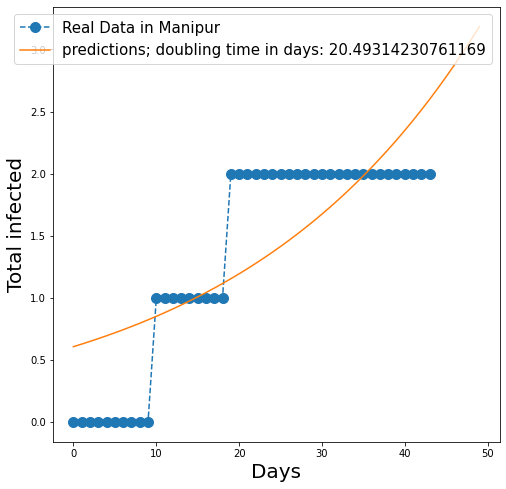

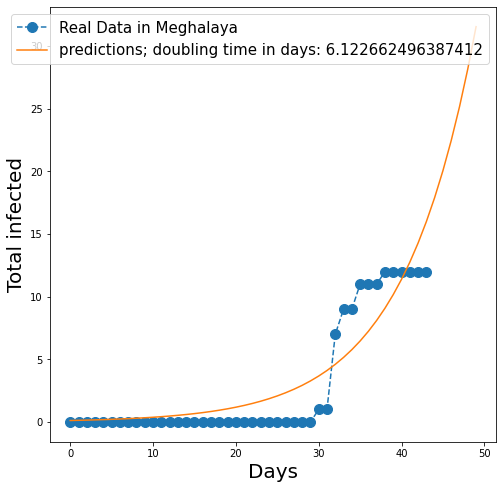

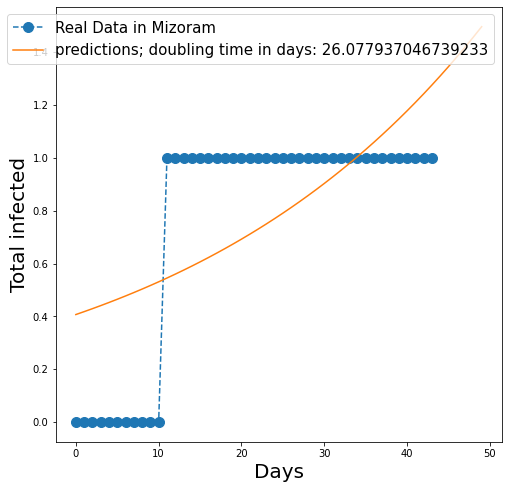

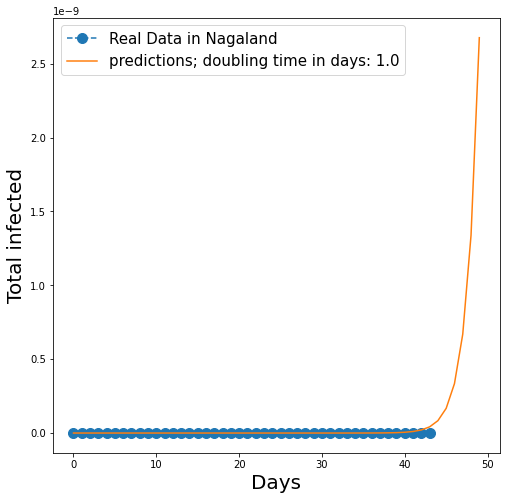

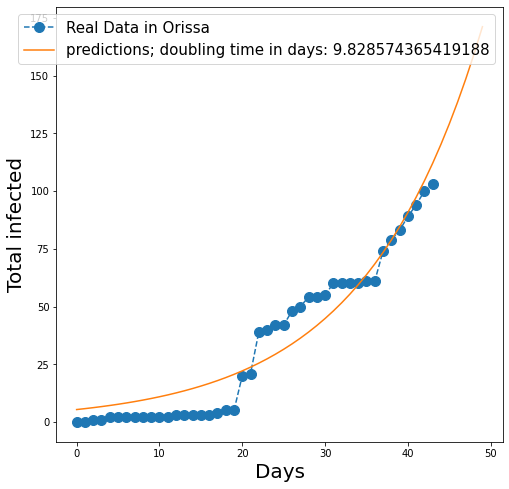

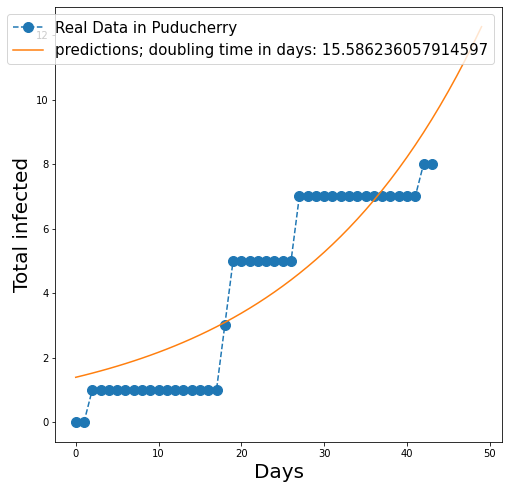

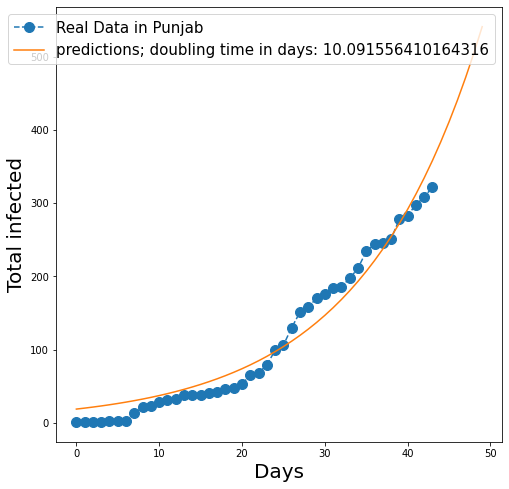

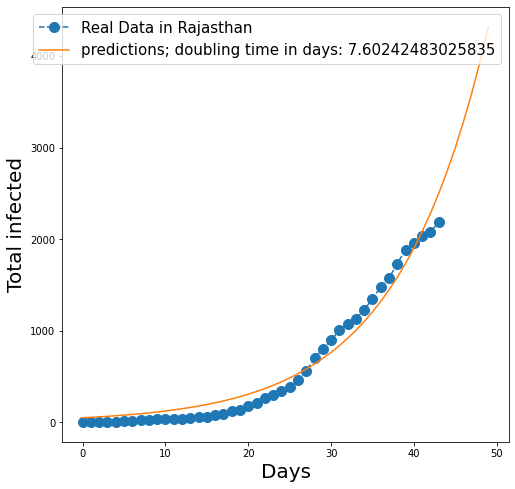

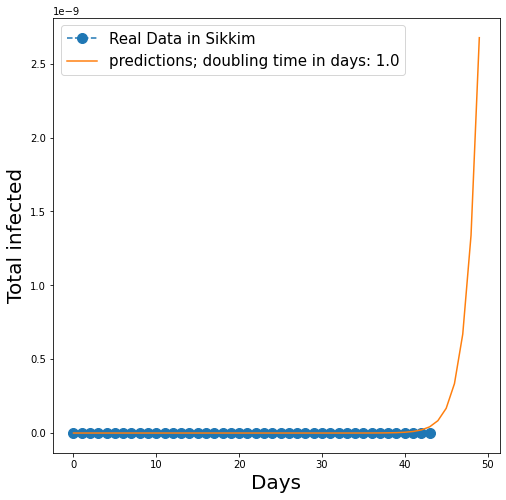

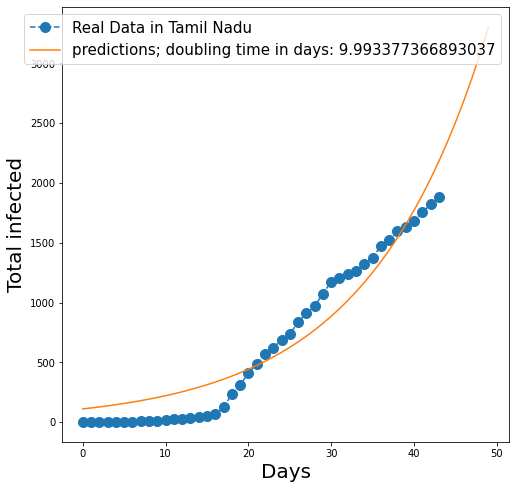

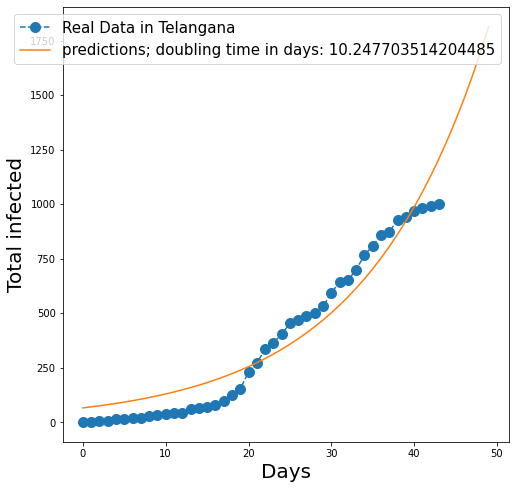

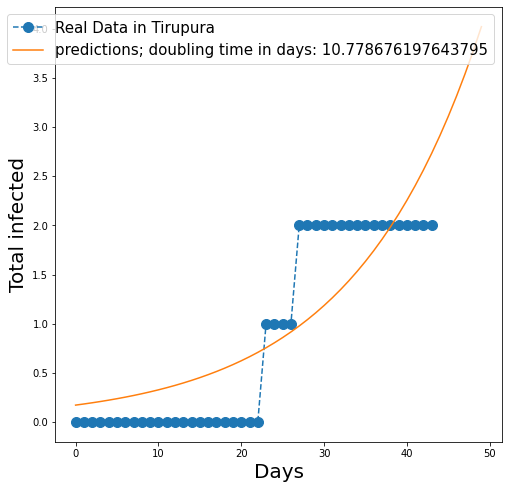

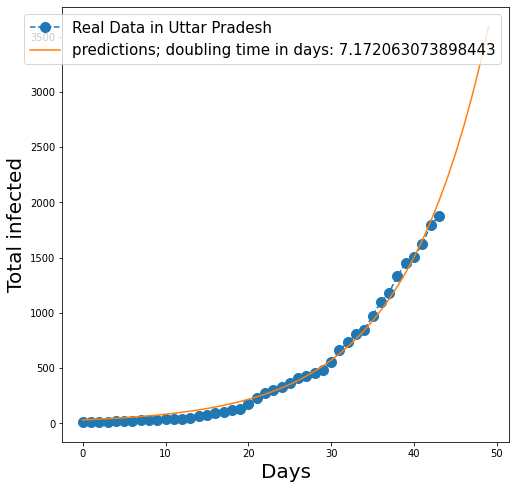

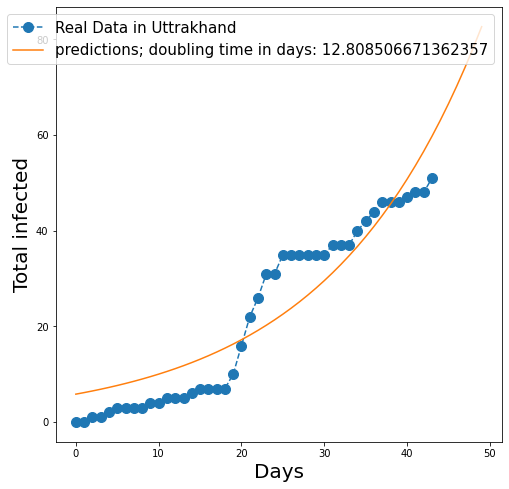

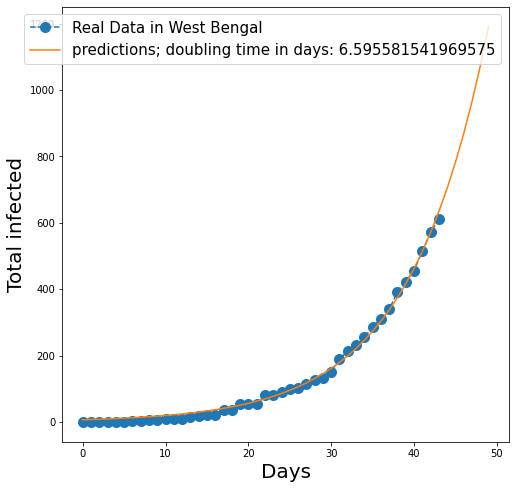

In [21]:
states = list(s_df.columns)
lis = []
for state in states[2:]:
  lis.append(state_progress(s_df,state,50))


ddf = pd.DataFrame(lis)
ddf

In [22]:
#Tests
link = 'https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv'

tests_df = pd.read_csv(link) 
tests_df.head()

Updated On  ... Population (Source: UIDAI)
0  17/04/2020  ...                   411278.0
1  24/04/2020  ...                        NaN
2  02/04/2020  ...                 53390841.0
3  10/04/2020  ...                        NaN
4  11/04/2020  ...                        NaN

[5 rows x 17 columns]

In [23]:
tests_df.replace('', 0, inplace=True)
tests_df['Updated On']= pd.to_datetime(tests_df['Updated On']) #,format='%d/%m/%Y') 
tests_df['Updated On'] = tests_df['Updated On'].dt.date
#tests_df['Total Tested'] = tests_df['Total Tested'].astype(str).astype(int)
#tests_df['Positive'] = tests_df['Positive'].astype(str).astype(int)
#tests_df['Negative'] = tests_df['Negative'].astype(str).astype(int)
#tests_df['Positive_percent'] = tests_df['Positive']/tests_df['Total Tested'] * 100
tests_df.replace(0, np.NaN, inplace=True)
tests_df.State.replace(np.NaN, 'Unknown', inplace= True)
tests_df.head()

Updated On  ... Population (Source: UIDAI)
0  2020-04-17  ...                   411278.0
1  2020-04-24  ...                        NaN
2  2020-02-04  ...                 53390841.0
3  2020-10-04  ...                        NaN
4  2020-11-04  ...                        NaN

[5 rows x 17 columns]

In [0]:
def tests_state_wise(df,state):
  tests_done = df[df['State']==state]
  try:
    tests_done.plot.bar('Updated On', ['Total Tested','Positive','Negative'])
    tests_done['Positive_percent'] = tests_done['Positive']/tests_df['Total Tested'] * 100
    tests_done.plot.bar('Updated On', ['Positive_percent'], title=state)
    #plt.plot(tests_done['Total Tested', 'Positive', 'Negative'])
  except:
    print("no data for "+str(state))
  return tests_done

In [25]:
tests_df.head()

Updated On  ... Population (Source: UIDAI)
0  2020-04-17  ...                   411278.0
1  2020-04-24  ...                        NaN
2  2020-02-04  ...                 53390841.0
3  2020-10-04  ...                        NaN
4  2020-11-04  ...                        NaN

[5 rows x 17 columns]

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


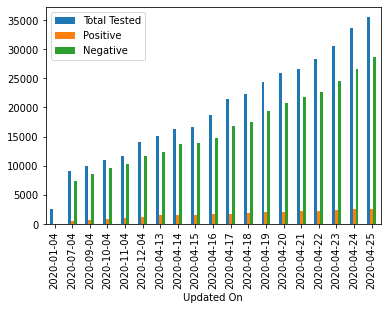

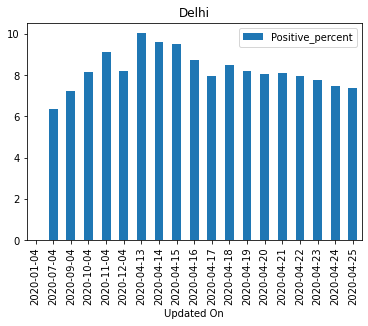

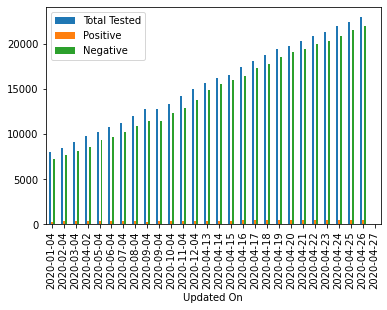

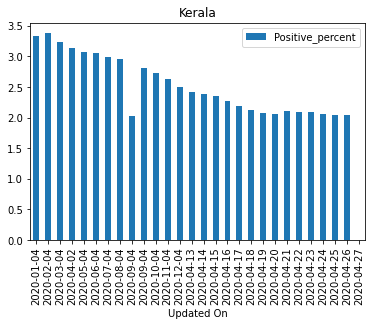

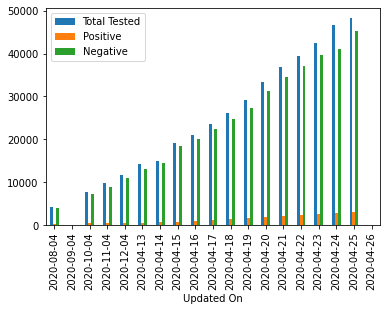

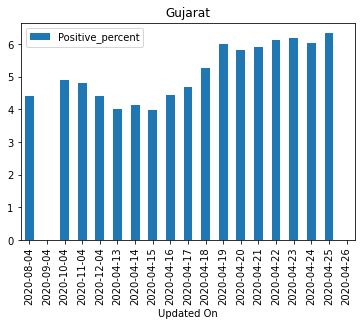

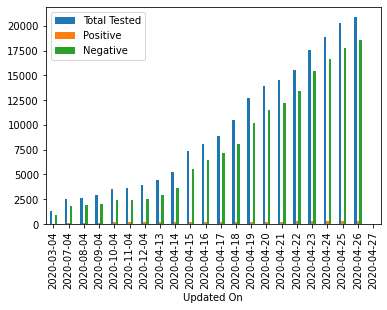

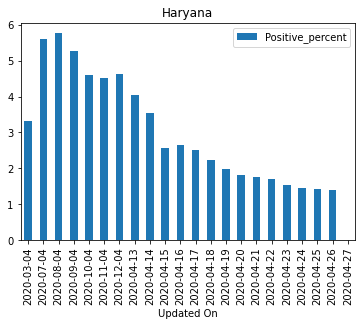

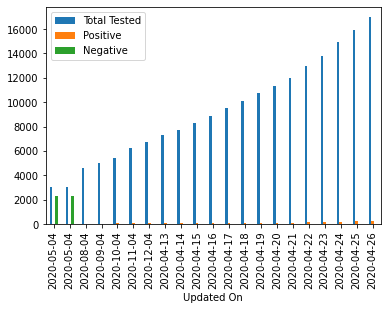

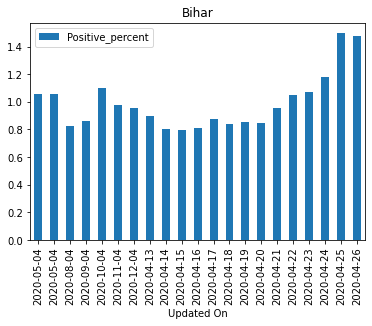

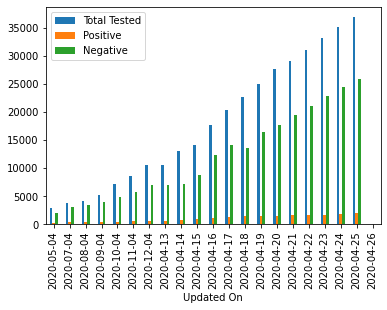

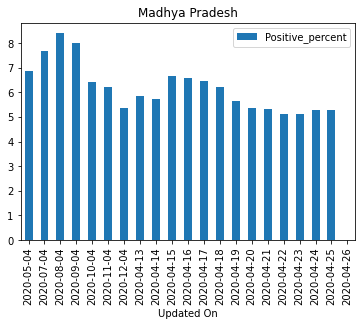

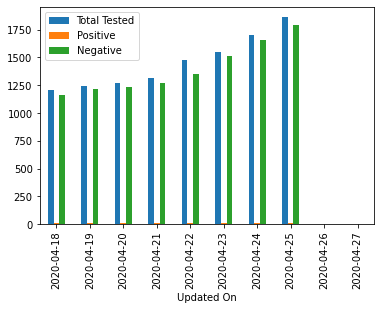

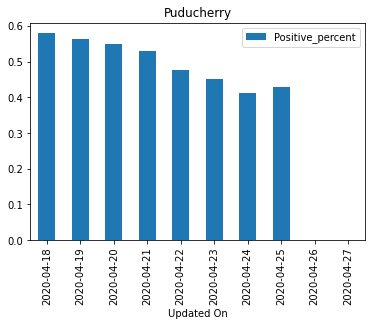

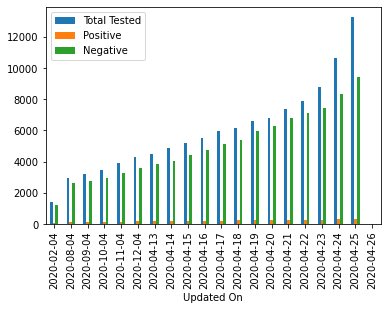

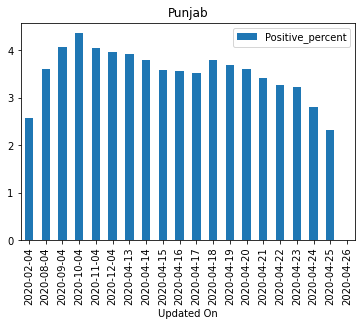

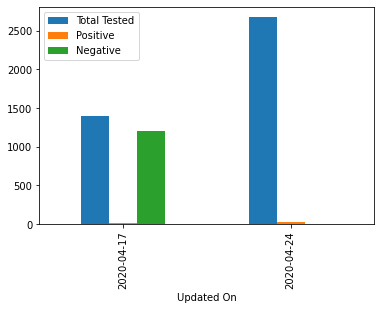

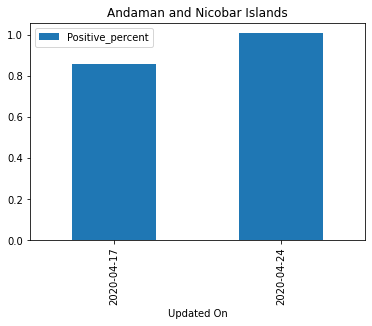

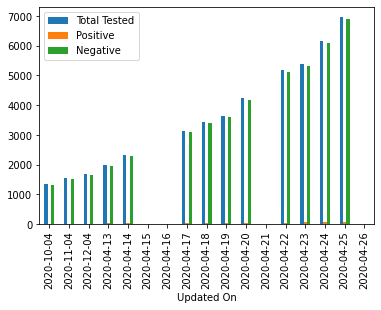

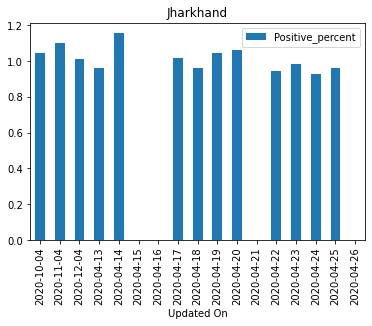

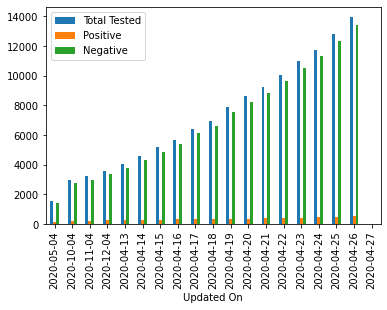

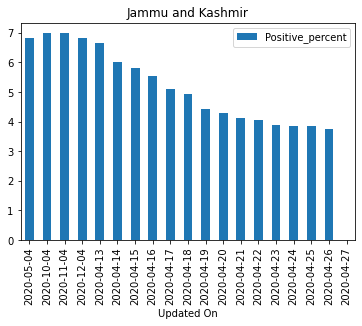

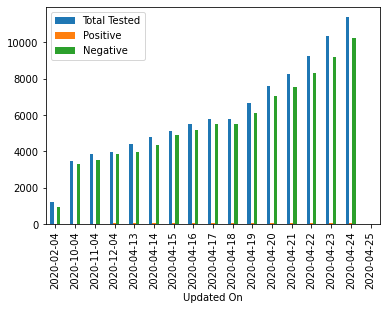

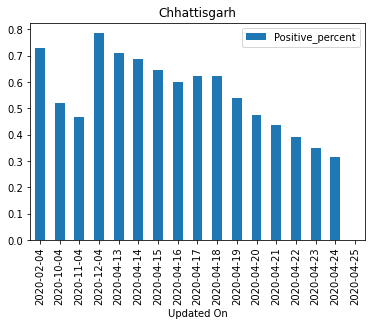

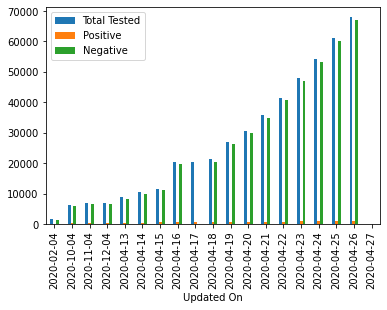

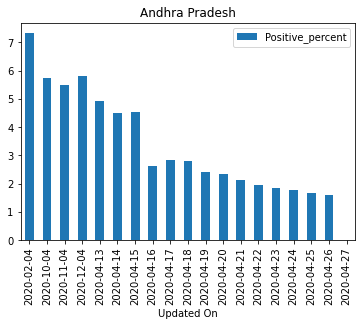

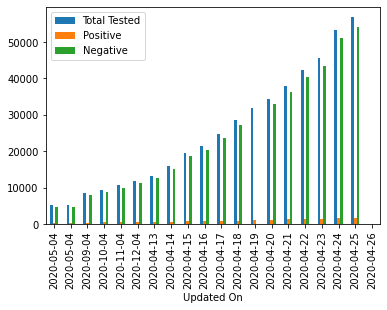

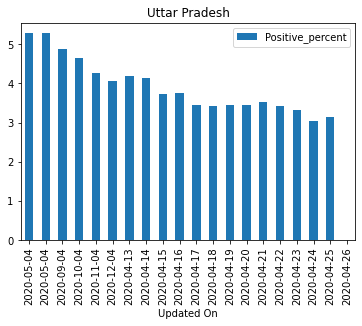

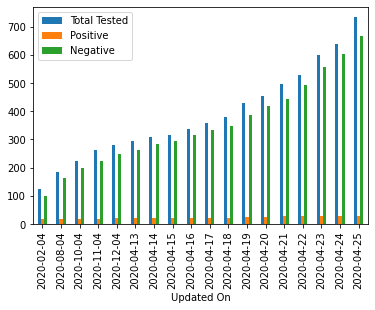

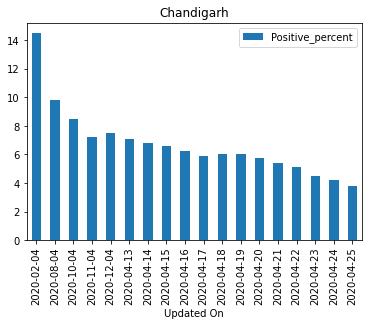

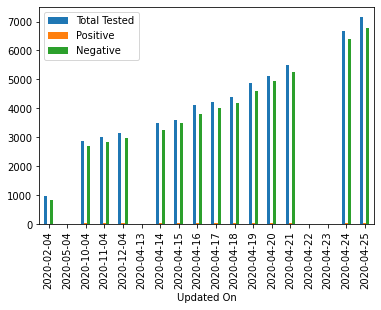

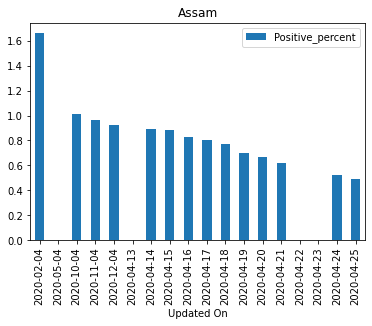

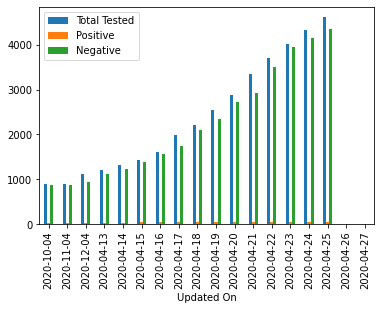

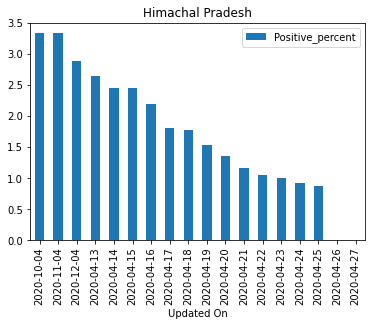

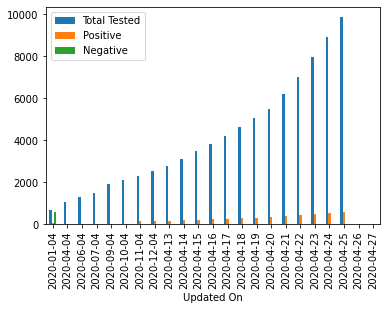

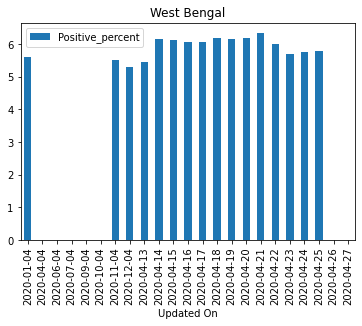

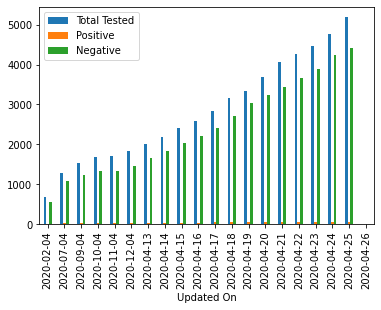

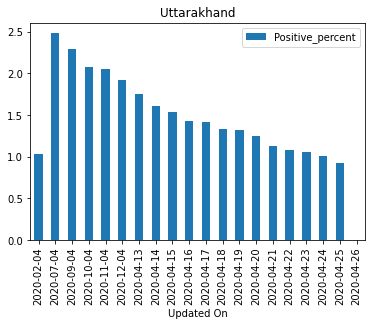

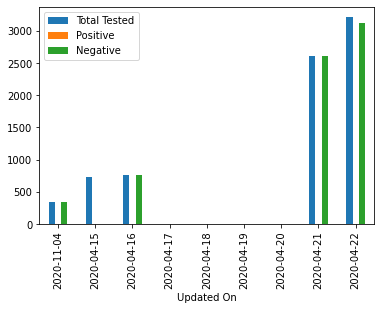

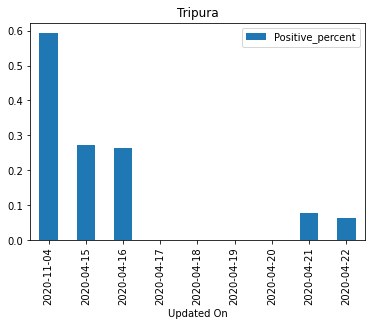

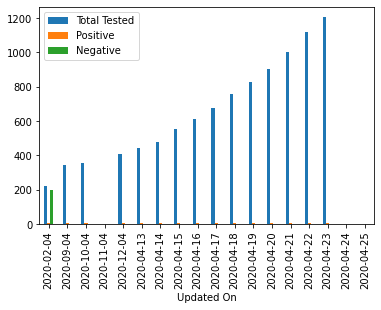

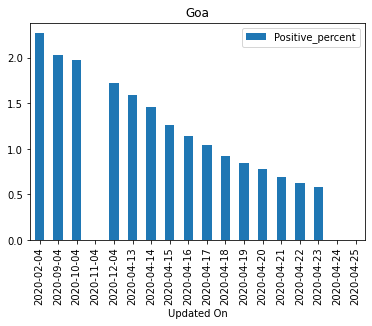

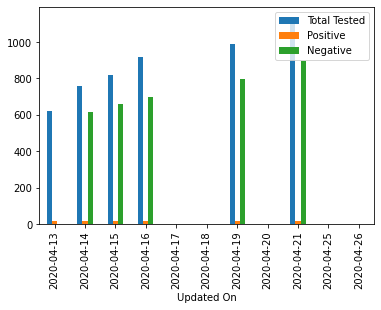

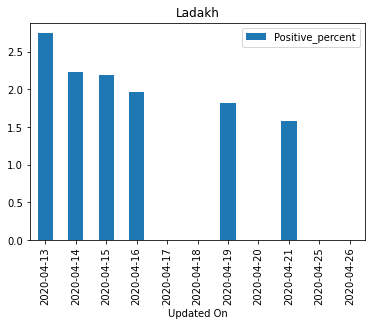

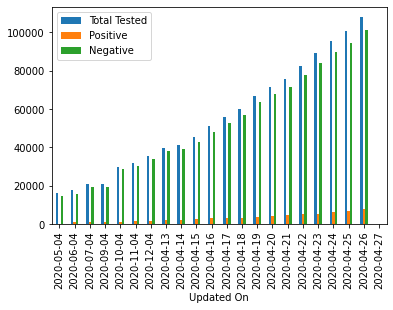

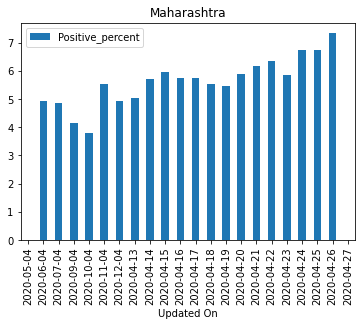

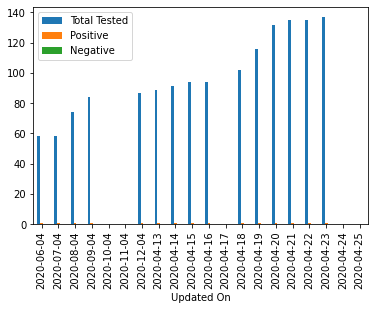

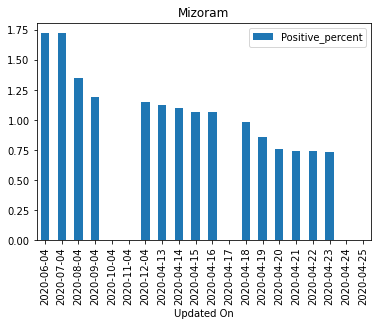

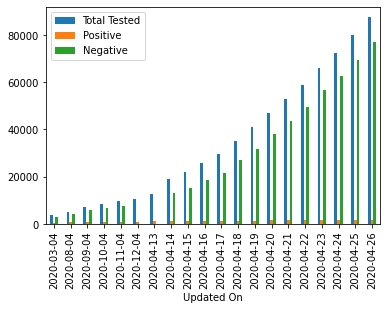

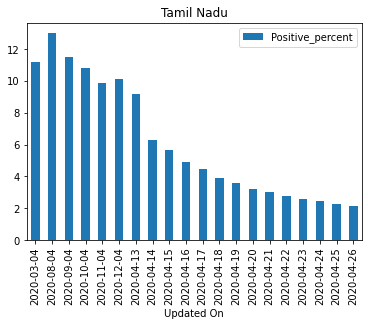

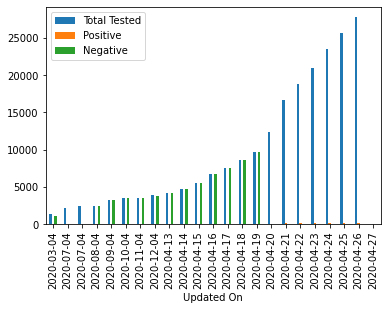

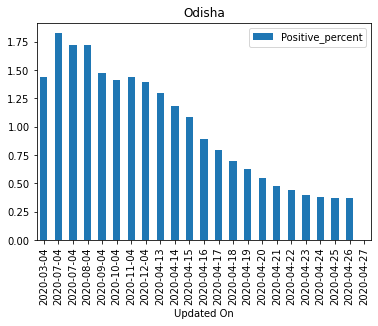

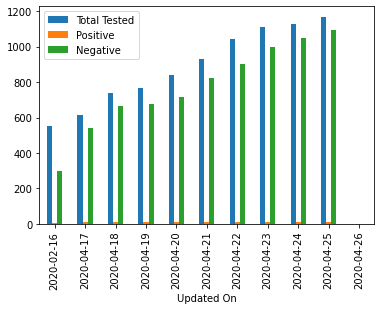

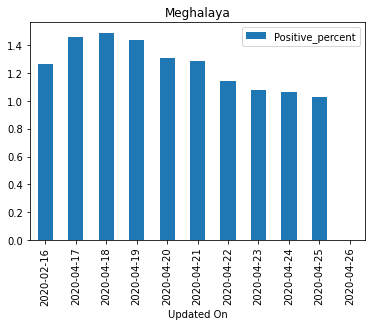

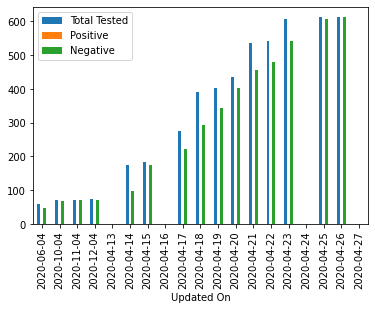

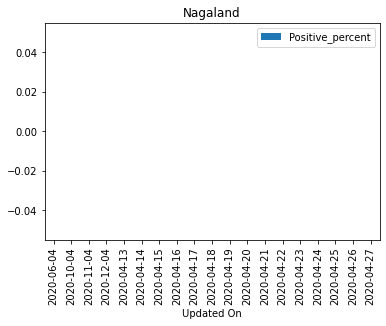

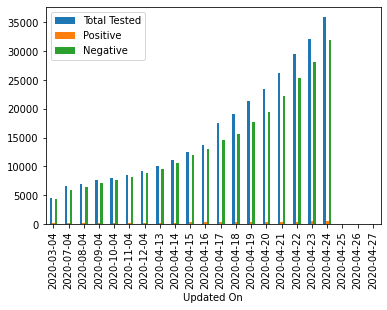

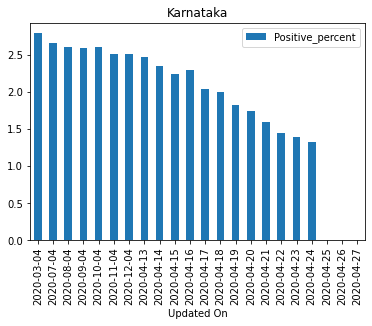

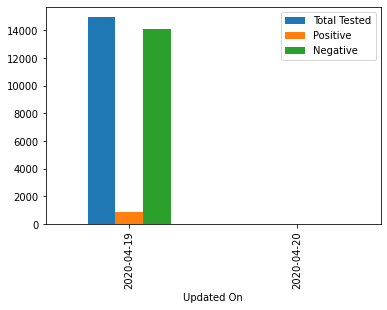

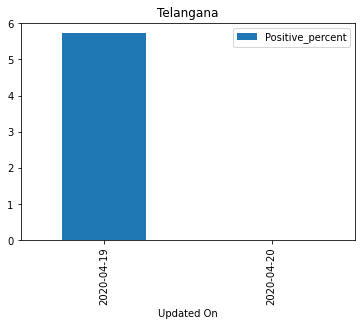

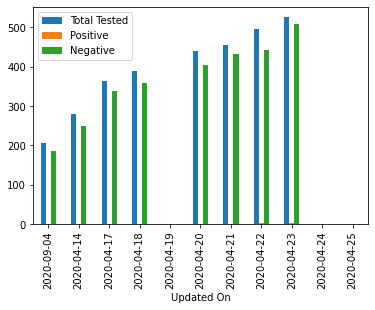

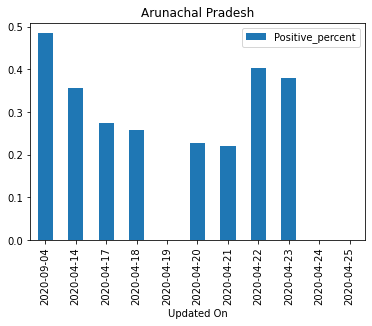

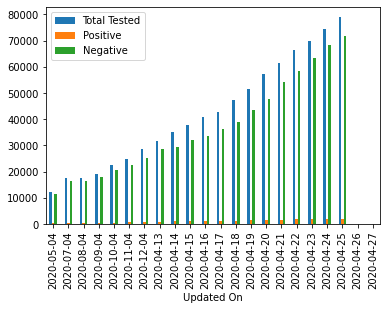

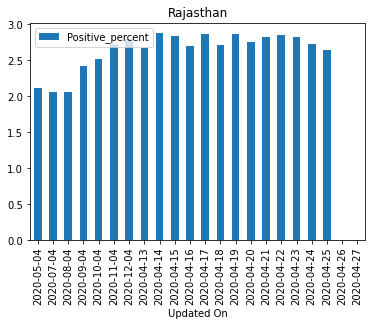

In [26]:
states = set(list(tests_df.State.values))
for state in states:
  tests = tests_state_wise(tests_df,state)

In [0]:
new_df = tests_df.loc[:,['Updated On','Total Tested', 'Positive', 'Negative', 'Unconfirmed']]


new_df = pd.pivot_table(new_df, index=['Updated On'], aggfunc=np.sum)
new_df['Positive_percent'] = new_df['Positive']/new_df['Total Tested'] * 100

In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 2020-01-04 to 2020-12-04
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negative          29 non-null     float64
 1   Positive          29 non-null     float64
 2   Total Tested      29 non-null     float64
 3   Unconfirmed       29 non-null     float64
 4   Positive_percent  28 non-null     float64
dtypes: float64(5)
memory usage: 1.4+ KB


In [0]:
new_df.sort_values(by=['Updated On'], inplace=True, ascending=True)

In [30]:
new_df

Negative  Positive  Total Tested  Unconfirmed  Positive_percent
Updated On                                                                 
2020-01-04    7824.0     302.0       11245.0       3119.0          2.685638
2020-02-04   12622.0     510.0       14906.0       1774.0          3.421441
2020-02-16     299.0       7.0         552.0        246.0          1.268116
2020-03-04   17242.0     898.0       20130.0       1990.0          4.461003
2020-04-02    8586.0     306.0        9744.0        852.0          3.140394
2020-04-04       0.0       0.0        1042.0          0.0          0.000000
2020-04-13  167714.0    9389.0      210051.0       7799.0          4.469867
2020-04-14  199078.0   10406.0      239647.0      15463.0          4.342220
2020-04-15  221704.0   11409.0      265276.0      15529.0          4.300804
2020-04-16  255022.0   12341.0      302949.0      17933.0          4.073623
2020-04-17  264619.0   13435.0      338140.0      19503.0          3.973206
2020-04-18  309477.0   14481.0      371123.0      23380.0          3.901941
2020-04-19  335108.0   16723.0      430601.0      24663.0          3.883642
2020-04-20  375924.0   17147.0      457197.0      26090.0          3.750462
2020-04-21  412139.0   18533.0      498859.0      24267.0          3.715078
2020-04-22  450405.0   19912.0      543605.0      24906.0          3.662954
2020-04-23  490504.0   20745.0      587928.0      24147.0          3.528493
2020-04-24  540202.0   22987.0      650974.0      29622.0          3.531170
2020-04-25  537645.0   23848.0      647253.0      28318.0          3.684494
2020-04-26  299859.0   12549.0      366805.0       4085.0          3.421164
2020-04-27       0.0       0.0           0.0          0.0               NaN
2020-05-04   53149.0    1493.0       59455.0       3640.0          2.511143
2020-06-04   25462.0    1196.0       29698.0        795.0          4.027207
2020-07-04   65229.0    3014.0       79123.0       4324.0          3.809259
2020-08-04   52602.0    2473.0       63058.0       3509.0          3.921786
2020-09-04  103024.0    4939.0      122239.0       6139.0          4.040445
2020-10-04  134416.0    6490.0      155566.0       5491.0          4.171863
2020-11-04  146285.0    7830.0      171360.0       7236.0          4.569328
2020-12-04  153599.0    8380.0      191530.0       7515.0          4.375294

In [0]:
dddf = ddf[ddf[3] <= ddf.loc[0,3]]
dddf.columns = ['State Code','State','Coeff',"Doubling Time in Days"]

In [0]:
new_ddf = dddf[dddf['Coeff'] > 1.0]

In [0]:
new_ddf.drop('Coeff', axis =1, inplace=True)

In [34]:
new_ddf.sort_values(by=['Doubling Time in Days'])

State Code          State  Doubling Time in Days
12         GJ        Gujarat               5.346385
5          BR          Bihar               6.099219
22         MH     Maharastra               6.509438
37         WB    West Bengal               6.595582
35         UP  Uttar Pradesh               7.172063
30         RJ      Rajasthan               7.602425
0          TT          India               7.773680

In [35]:
dddf

State Code                   State         Coeff  Doubling Time in Days
0          TT                   India  6.479478e+02               7.773680
5          BR                   Bihar  1.959065e+00               6.099219
8          DN  Dadra and Nagar Haveli  4.755077e-24               1.000000
9          DD           Daman and Diu  4.755077e-24               1.000000
12         GJ                 Gujarat  1.380222e+01               5.346385
16         JH               Jharkhand  6.267572e-01               6.158689
20         LD             Lakshadweep  4.755077e-24               1.000000
21         MP          Madhya Pradesh -1.000000e+00              -1.000000
22         MH              Maharastra  8.768305e+01               6.509438
24         ML               Meghalaya  1.229595e-01               6.122662
26         NL                Nagaland  4.755077e-24               1.000000
30         RJ               Rajasthan  4.960150e+01               7.602425
31         SK                  Sikkim  4.755077e-24               1.000000
35         UP           Uttar Pradesh  3.151293e+01               7.172063
37         WB             West Bengal  6.907040e+00               6.595582